<a href="https://colab.research.google.com/github/ozyeon/DataTranslator_2022_w4/blob/main/4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 데이터 탐색
 - 시각화 VS 통계량

# 1.PCA

- Dimension Reduction
  - 차원의 저주: 변수(차원)가 증가하면서 고차원으로 갈수록 희소(sparse)해짐 (무작위로 두 점의 평균 거리를 산출했을 때 그 거리가 멀어짐)
  - 해결하기 위해 엄청나게 많은 데이터를 확보하는 방법이 있지만, 차원이 늘어날수록 필요한 데이터의 양이 기하급수적으로 증가하여, 현실적으로는 불가능
  - 데이터를 저차원으로 투영하여 차원 축소를 진행

- PCA (Principal Component Analysis): 데이터를 정사영시켜 차원을 낮춘다면, 어떤 벡터에 정사영 시키는 것이 원 데이터 구조를 잘 유지할 수 있을까"에 대한 분석
 - "데이터 벡터를 어떤 벡터에 정사영하는 것이 최적의 결과일지
정사영할 벡터를 찾을 때 데이터 분포의 중심을 축(pivot)으로 하는 벡터를 찾는 것이 좋지 않을지"

- PCA의 가정
  - 대상이 되는 데이터는 linear하며, 우리가 찾은 선들은 직교
linear한 것을 가정, 선형 결합으로 표현하기 때문에 비선형 데이터에 취약할 수 있음
큰 분산을 가지는 축이 중요한 정보를 가지고 있을 것
  - 분산이 높다는 것은, 감소시킨 차원이 일정 부분 변화할 때 기존 변수도 높은 관계성을 가지고 변화한다는 것을 의미
  - 공분산: feature pairs의 변동이 얼마나 유사한지. 즉, 하나의 feature이 변화할 때 다른 feature의 변화가 얼마나 유사한지
  - PCA의 과정: 정사영 후 각 차원의 분산을 최대화하는 것에 관심이 있음
가장 큰 분산을 가지는 축을 찾은 후, 먼저 찾은 축을 기준으로 직교하는 축들 중에 또 가장 큰 축을 찾는 과정을 거침
  - 새로 생성된 각 차원들은 선형독립임
  - 하나의 component가 다른 component보다 적은 분산을 가질 경우 분산이 큰 component를 더 중요하게 반영하여 PCA가 수행될 것임
  - PCA를 하는 것은 자료를 요약하고, 메모리를 절약하고 과적합 방지, 정보손실을 적게 하면서도 불필요한 변수들을 새로운 변수로/제거, 이미지의 경우 (e.g., eigenface) 노이즈 감소 등의 효과

In [1]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 405 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=e8ee6b55471993471a070c9b156f2000a2c47cffb382c169acb14caff353eef3
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [3]:
data = pd.read_csv('bfi.csv', index_col =0)
data.drop(['gender', 'education', 'age'], axis=1, inplace=True)
data.dropna(inplace=True)
# data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25']
data.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


  - PCA을 수행하기 전 standardization을 통해 분산을 고정하는 것이 중요함
   - 데이터의 스케일에 따라 주성분의 설명 가능한 분산량이 달라질 수 있음
따라서, scaling(centering)을 통해 변수가 가진 값의 크기에 따라 설명 가능한 분산량이 왜곡되는 것에 따른 모델 성능이 저하를 방지함
   - 예를 들어, 키(m)와 몸무게(kg)가 다른 scale을 가지고 있을 때 (키가 더 적게 변화) scaling을 하지 않으면 몸무게가 maximal variance의 방향을 결정할 것임. 따라서 키(m)의 변화 1은 몸무게(kg)의 변화 1보다 더 중요하게 반영이 될 것인데 이렇게 다른 가중치를 두는 것을 옳지 않음
   - 공분산 행렬을 계산할 때 각 feature의 평균은 0으로 맞춰주어야 결과에 대해 직관적으로 해석하기 용이함

In [5]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
data_scale.mean(axis=0).head()

A1    1.400084e-16
A2   -4.200253e-16
A3   -2.245968e-16
A4    1.079232e-16
A5   -2.741832e-16
dtype: float64

In [6]:
data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
data_scale.mean(axis=0).head()

A1    1.400084e-16
A2   -4.200253e-16
A3   -2.245968e-16
A4    1.079232e-16
A5   -2.741832e-16
dtype: float64

In [7]:
data_scale.cov() # 공분산행렬

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.000411,-0.351050,-0.273748,-0.156818,-0.192777,0.014704,0.012924,-0.020595,0.115121,0.038309,...,0.168348,0.139871,0.092404,0.042157,0.015187,0.005784,0.066203,-0.063814,-0.090549,0.099206
A2,-0.351050,1.000411,0.503248,0.351000,0.397563,0.103025,0.129627,0.188895,-0.146355,-0.121156,...,-0.093666,-0.050496,-0.040424,-0.086771,0.019696,0.125685,0.013964,0.165387,0.082643,-0.080871
A3,-0.273748,0.503248,1.000411,0.385076,0.515890,0.114258,0.146571,0.129444,-0.121165,-0.153875,...,-0.083300,-0.092511,-0.039174,-0.127160,-0.040159,0.150148,0.006590,0.226426,0.032280,-0.041768
A4,-0.156818,0.351000,0.385076,1.000411,0.325778,0.094851,0.226547,0.133119,-0.172342,-0.249778,...,-0.106689,-0.155352,-0.073918,-0.171298,-0.015142,0.057099,0.037779,0.071012,-0.049814,0.027319
A5,-0.192777,0.397563,0.515890,0.325778,1.000411,0.134747,0.116911,0.130873,-0.125582,-0.167105,...,-0.204849,-0.198918,-0.138529,-0.215434,-0.081438,0.162663,-0.006991,0.238289,0.011359,-0.050470
C1,0.014704,0.103025,0.114258,0.094851,0.134747,1.000411,0.438403,0.317400,-0.362640,-0.261187,...,-0.071984,-0.038196,-0.025487,-0.098075,-0.047989,0.179323,-0.129316,0.196643,0.100231,-0.130525
C2,0.012924,0.129627,0.146571,0.226547,0.116911,0.438403,1.000411,0.362975,-0.396252,-0.303944,...,-0.019959,-0.005588,0.003190,-0.044359,0.051233,0.161108,-0.057370,0.192760,0.047446,-0.066617
C3,-0.020595,0.188895,0.129444,0.133119,0.130873,0.317400,0.362975,1.000411,-0.357971,-0.351093,...,-0.079126,-0.066908,-0.077447,-0.122225,-0.023518,0.091179,-0.029616,0.058904,0.011365,-0.002810
C4,0.115121,-0.146355,-0.121165,-0.172342,-0.125582,-0.362640,-0.396252,-0.357971,1.000411,0.487751,...,0.215940,0.158411,0.201988,0.270744,0.197143,-0.093599,0.208158,-0.083061,0.053036,0.189621
C5,0.038309,-0.121156,-0.153875,-0.249778,-0.167105,-0.261187,-0.303944,-0.351093,0.487751,1.000411,...,0.216503,0.246400,0.241698,0.354810,0.179083,-0.085665,0.122646,-0.074159,0.135538,0.055827


 - Principle component 수 선택
  - PC 선택: 몇 개까지 선택할지는 분석가의 결정에 따름
   - 방안 1: Eigen value가 1 이상일 때까지
   - 방안 2: Scree plot 그래프 기울기가 완만해지기 전의 값까지
   - 방안 3: 약 80% 이상의 분산을 설명하는 PC 개수 채택

In [8]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)
print(data_scale)
print(X_p)

             A1        A2        A3        A4        A5        C1        C2  \
61617 -0.288867 -0.676006 -1.219235 -0.463061 -0.427781 -2.044561 -1.040527   
61618 -0.288867 -0.676006  0.306218 -1.809945  0.359284  0.384581 -0.282309   
61620  1.843498 -0.676006  0.306218 -0.463061 -0.427781 -0.425133  0.475910   
61621  1.132710 -0.676006  1.068944  0.210382  0.359284 -0.425133 -0.282309   
61622 -0.288867 -1.523972 -1.219235 -0.463061  0.359284 -0.425133 -0.282309   
...         ...       ...       ...       ...       ...       ...       ...   
67547  0.421921 -0.676006 -1.219235 -2.483387 -1.214845  0.384581 -0.282309   
67549  1.843498  0.171960  0.306218  0.210382 -1.214845  0.384581 -0.282309   
67556 -0.288867 -1.523972  0.306218 -1.809945  0.359284  0.384581  0.475910   
67559  1.843498 -2.371938 -1.981961 -0.463061 -0.427781  0.384581  0.475910   
67560 -0.288867 -1.523972 -2.744688 -0.463061 -2.001910  0.384581  0.475910   

             C3        C4        C5  ...        N1 

In [ ]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)
print(X_p[0])

[ 2.37029862  1.85653586 -2.5612541   0.50079374  0.76656487  0.55201673
 -0.83449393  0.38513642  0.61608308  0.45382584 -0.67012877 -0.89371193
  0.85359209  0.59690019  0.06642455 -0.01177417 -0.01802028  0.08238984
  0.81749756  0.09608201 -0.0725416  -0.06881392  0.06860934  0.23984858
 -0.20102321]


- 방안 1. Eigen value가 1 이상일 때까지
Eigen vector (고유 벡터): 데이터가 어떤 방향으로 분산되어 있는지. 행렬이 벡터에 작용하는 주축(principal axis)의 방향을 나타냄
원 차원의 수만큼 eigenvector가 생성됨
주축 위에 정사영하는 것이 분산이 가장 큰 결과를 얻을 수 있음 (선형변환을 했을 때 크기만 바뀌고 방향이 변하지 않도록 함)
 - Eigen value (고유 값): 고유벡터 방향으로 얼마만큼의 크기로 벡터공간이 늘려지는가, 즉 고유벡터의 크기를 의미함
 - Eigen value가 큰 순서대로 고유 벡터를 정렬하는 것이, 중요한 순서대로 주성분을 구성한다는 의미



In [ ]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))


eigen value: [5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247
 0.83953893 0.79920618 0.71898919 0.68808879 0.67637336 0.65179984
 0.62325295 0.59656284 0.56309083 0.54330533 0.51451752 0.49450315
 0.48263952 0.448921   0.42336611 0.40067145 0.38780448 0.38185679
 0.26253902] 

적합한 PC 개수: 6


   - 방안 2. Scree plot 그래프 기울기가 완만해지기 전까지
Scree plot: 고유값-주성분의 분산 변화를 보는 그래프로, 고유값 변화율이 완만해지는 부분이 필요한 주성분의 수

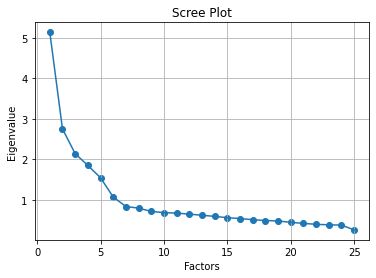

In [ ]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

   - Factors가 (6 -> 7) 이후로 (7 -> 8)에서 기울기가 완만해지는 것을 보임
따라서 기울기가 완만해지기 전의 값으로, 적합한 PC 개수는 6

In [9]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [0.20537245 0.11007547 0.08570808 0.0740931  0.06192651 0.0429433
 0.03358156 0.03196825 0.02875957 0.02752355 0.02705493 0.02607199
 0.02493012 0.02386251 0.02252363 0.02173221 0.0205807  0.01978013
 0.01930558 0.01795684 0.01693464 0.01602686 0.01551218 0.01527427
 0.01050156]
누적 분산 설명 비율:
 [0.20537245 0.31544791 0.40115599 0.4752491  0.53717561 0.58011891
 0.61370047 0.64566871 0.67442828 0.70195183 0.72900677 0.75507876
 0.78000888 0.80387139 0.82639503 0.84812724 0.86870794 0.88848807
 0.90779365 0.92575049 0.94268513 0.95871199 0.97422417 0.98949844
 1.        ]


In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [0.20537245 0.11007547 0.08570808 0.0740931  0.06192651 0.0429433
 0.03358156 0.03196825 0.02875957 0.02752355 0.02705493 0.02607199
 0.02493012 0.02386251 0.02252363 0.02173221 0.0205807  0.01978013
 0.01930558 0.01795684 0.01693464 0.01602686 0.01551218 0.01527427
 0.01050156]
누적 분산 설명 비율:
 [0.20537245 0.31544791 0.40115599 0.4752491  0.53717561 0.58011891
 0.61370047 0.64566871 0.67442828 0.70195183 0.72900677 0.75507876
 0.78000888 0.80387139 0.82639503 0.84812724 0.86870794 0.88848807
 0.90779365 0.92575049 0.94268513 0.95871199 0.97422417 0.98949844
 1.        ]


   - PC 6까지 채택할 경우, 누적 분산 설명 비율은 약 58%

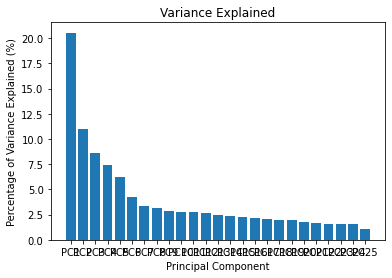

In [ ]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

  - 방안 3. 약 80% 이상의 분산을 설명하는 PC 건수 채택

In [ ]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.85 이상
print('적합한 PC 개수:', d) # 17개 선택 (PC16까지 활용)

적합한 PC 개수: 14


 - Step 3. PCA
  - 방안 1, 방안 2에서 공통적으로 제시한 결과를 기반으로, PC 6까지 사용하여 실습을 진행

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Eigen Vector
pd.DataFrame(pca.components_[:,:6], 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
             index=data.columns)

,PC1,PC2,PC3,PC4,PC5,PC6
A1,0.110202,-0.218902,-0.245872,-0.201804,-0.270364,-0.165829
A2,0.015719,-0.188571,-0.190528,-0.075120,-0.113973,-0.092649
A3,0.118324,-0.153905,-0.201259,-0.129908,-0.210261,0.357013
A4,0.029509,0.090576,0.067831,0.241235,0.016945,0.153227
A5,0.490281,-0.333324,-0.255208,-0.189163,-0.150969,0.032915
C1,-0.422041,0.162960,-0.043447,-0.046223,-0.187215,-0.125232
C2,0.194210,-0.159139,0.127331,0.502886,0.047269,-0.203797
C3,0.040235,0.242298,0.164480,0.119154,-0.091919,-0.330289
C4,0.195248,-0.031171,-0.004665,0.395280,-0.036071,0.208255
C5,0.207383,-0.086872,-0.119081,0.113891,-0.003064,-0.425534


In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Eigen Vector
pd.DataFrame(pca.components_[:,:9], 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'], 
             index=data.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
A1,0.110202,-0.218902,-0.245872,-0.201804,-0.270364,-0.165829,-0.159166,-0.154533,0.217421
A2,0.015719,-0.188571,-0.190528,-0.075120,-0.113973,-0.092649,-0.130385,-0.034178,-0.079464
A3,0.118324,-0.153905,-0.201259,-0.129908,-0.210261,0.357013,0.345691,0.269473,-0.326097
A4,0.029509,0.090576,0.067831,0.241235,0.016945,0.153227,0.280854,0.324317,-0.204938
A5,0.490281,-0.333324,-0.255208,-0.189163,-0.150969,0.032915,-0.006217,-0.028446,0.000218
C1,-0.422041,0.162960,-0.043447,-0.046223,-0.187215,-0.125232,-0.148398,-0.032815,-0.314867
C2,0.194210,-0.159139,0.127331,0.502886,0.047269,-0.203797,0.100605,-0.276770,-0.017382
C3,0.040235,0.242298,0.164480,0.119154,-0.091919,-0.330289,-0.167552,0.117823,0.031498
C4,0.195248,-0.031171,-0.004665,0.395280,-0.036071,0.208255,0.084166,-0.461425,-0.091705
C5,0.207383,-0.086872,-0.119081,0.113891,-0.003064,-0.425534,-0.258488,0.311066,-0.073296


In [ ]:
X_pp = pd.DataFrame(X_p[:,:6], 
                    columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
                    index = data.index)

X_pp # PCA 이후 만들어진 data (PC1~ PC6로 총 6개 변수로 축소)

,PC1,PC2,PC3,PC4,PC5,PC6
61617,2.370299,1.856536,-2.561254,0.500794,0.766565,0.552017
61618,0.372980,-0.147845,-1.126236,-0.307562,0.999889,0.623553
61620,0.831955,-0.659628,0.507829,-0.425028,1.566589,0.140086
61621,1.468606,1.063837,-2.140233,0.567288,0.684166,-1.389421
61622,0.350837,1.004977,-0.621911,0.726829,1.533974,0.672661
...,...,...,...,...,...,...
67547,4.066964,-1.053212,2.068989,-0.581108,0.216626,0.849262
67549,0.770074,-1.500500,0.446098,-2.009404,0.811757,-1.047096
67556,-1.568841,0.190316,1.643275,-0.783050,1.882051,0.596238
67559,1.539287,-0.941642,1.675189,-1.227477,3.000000,0.007268


 - Plot
차원을 축소한 결과를 plot

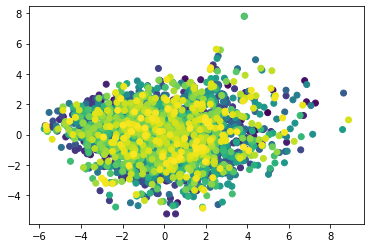

In [ ]:
# Principal Component Pattern Plot 1

plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index)

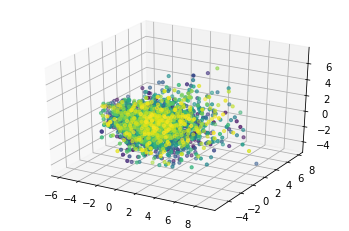

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_pp['PC1'],X_pp['PC2'],X_pp['PC3'], s=10, c = X_pp.index)
plt.show()

# 2. Clustering

- Unsupervised Learning: Y label이 없는 데이터에서 패턴을 찾는 방법
- Clustering: 거리가 가까운 관측치들 간 유사한 특징이 있을 것이라는 가정을 기반으로 변수들을 군집화
  - 정답이 없으므로 탐색 인사이트 용도로 사용
  - 대부분 optimization 문제를 푸는 경우가 많음
  - 1) 계층적 클러스터링 (hierarchical clustering)과 2) 비계층적 클러스터링(K-means clustering)으로 구분됨
    - 1) 거리행렬을 기반으로 가까운 대상끼리 순차적으로 그룹을 할당
    - 2) 랜덤한 시작점에서 해당 점과 가까운 대상 간 그룹 할당

- 이상치가 존재할 경우 클러스터링 진행 시 영향을 많이 받을 수 있으므로 사전에 제거 과정이 필요

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd 
data = pd.read_csv('fa_data_bfi.csv')

In [3]:
from IPython.display import display
display(data.head())
print('\n', data.shape)

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384
2,0.520534,0.318235,0.025646,-0.751136,0.204503
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042



 (2436, 5)


In [4]:
# 이상치 제거 함수 (1Q - 1.5*IQR, 3Q + 1.5*IQR 을 넘어가는 값을 가진 행을 제거)
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [5]:
for col in data.columns:
    outlier_idx = get_outlier(df=data, column=col, weight=1.5)
    data.drop(outlier_idx, axis=0, inplace=True)

In [6]:
display(data.head())
print('\n', data.shape)   # 이상치 행 11개 삭제

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384
2,0.520534,0.318235,0.025646,-0.751136,0.204503
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042



 (2335, 5)


- large scale 데이터를 사용할 경우 계산량이 많아지며, 클러스터링 시 값의 range의 영향을 받기 때문에 표준화/scaling이 필요

In [7]:
data.describe() # 기초통계량

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,0.003113,0.030340,0.025799,0.054182,0.003259
std,0.913940,0.836298,0.821891,0.764686,0.808914
min,-2.011680,-2.287489,-2.320576,-2.107187,-2.294768
25%,-0.718653,-0.498024,-0.526410,-0.439648,-0.570231
50%,-0.056327,0.097684,0.088043,0.142092,0.025512
75%,0.650523,0.655036,0.634843,0.614244,0.609261
max,2.551124,2.336969,1.893386,2.179653,2.011314


In [9]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(data)

In [10]:
scaled = pd.DataFrame(scaled, columns = data.columns)
scaled.describe() # 기초통계량

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
count,2.335000e+03,2.335000e+03,2.335000e+03,2.335000e+03,2.335000e+03
mean,1.369354e-17,-3.043010e-18,-3.043010e-18,-9.889781e-18,2.890859e-17
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-2.204987e+00,-2.772128e+00,-2.855461e+00,-2.827083e+00,-2.841488e+00
25%,-7.899000e-01,-6.319241e-01,-6.720208e-01,-6.459321e-01,-7.091154e-01
50%,-6.505121e-02,8.054349e-02,7.574925e-02,1.149865e-01,2.751602e-02
75%,7.085238e-01,7.471380e-01,7.411858e-01,7.325648e-01,7.493164e-01
max,2.788539e+00,2.758732e+00,2.272792e+00,2.780129e+00,2.482941e+00


# 계층적 클러스터링 (Hierarchical Clustering)
- 거리 행렬을 기반으로 유사한 관측치끼리 묶음
  - 모든 관측치들 간 거리를 계산함
- 거리를 어떻게 계산할지에 따라 linkage method 구분  
  1) 최단연결법 (single): 생성된 군집에서 중심과 거리가 **가까운** 관측치끼리 군집화  
  2) 최장연결법 (complete): 생성된 군집에서 중심과 거리가 **먼** 관측치끼리 군집화  
  3) 평균연결법 (average): 군집 내 모든 데이터와 다른 군집 내 모든 데이터 간의 거리 **평균**을 계산하여 군집화  
  4) 중앙연결법 (centroid): 군집 내 **centroid**과 다른 군집 내 median까지의 거리를 계산하여 가까운 것끼리 군집화  
$$\vec{\mu}(\omega_i)\cdot\vec{\mu}(\omega_j)=(\frac{1}{N_i}\sum_{d_m\in\omega_i}\vec{d_m})\cdot(\frac{1}{N_j}\sum_{d_n\in\omega_j}\vec{d_n})=\frac{1}{N_i}\frac{1}{N_j}\sum_{d_m\in\omega_i}\sum_{d_n\in\omega_j}{\vec{d_m}\cdot\vec{d_n}}$$
  5) 와드연결법 (ward): 거리가 아닌, 군집 내 오차 제곱합(within group sum of squares)이 최소가 되도록 최소가 되도록 군집화
$$SSE=\sum^K_{i=1}SSE_i=\sum^{K}_{i=1}\sum^{n_i}_{j=1}\sum^{m}_{k=1}(x_{ijk}-\bar{x}_{ik})^2$$

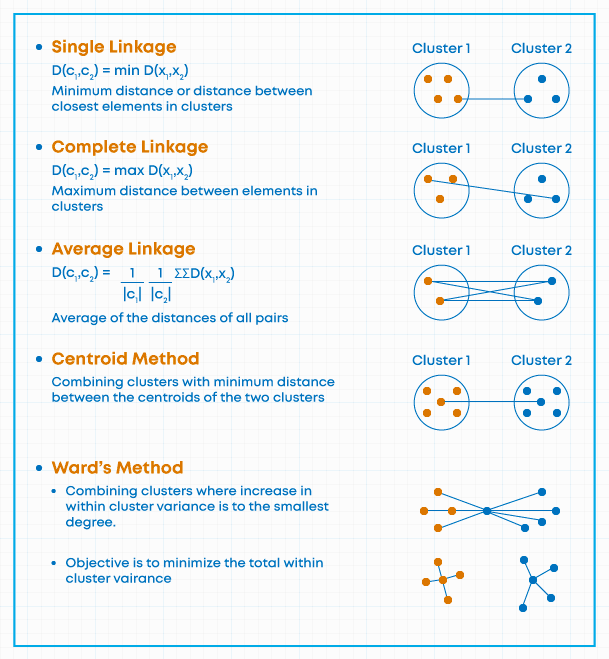
- [출처](https://dataaspirant.com/hierarchical-clustering-algorithm/)

- 장점
    - 클러스터 생성 과정에 대해 이해할 수 있음
    - 사전에 클러스터의 수를 지정하지 않아도 됨
    - 덴드로그램을 통해 클러스터의 수를 결정하는 과정이 쉬움
- 한계
    - 방대한 양의 데이터에서 제대로 작동하지 않을 수 있음
    - 두 클러스터를 결합한 이후에는 그 전으로 돌아갈 수 없음
    - 노이즈 및 이상값에 대해 민감
    - 데이터의 순서가 최종 결과에 영향을 줄 수 있음


## Step 1. 거리 계산에 따른 클러스터링
- `scipy.cluster.hierarchy`의 `linkage` 사용
- [제공하는 linkage 방식](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)
  -  single, complete, average, centroid, median, ward, weighted
- [제공하는 거리 계산 방식](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)
  - euclidean distance: real-valued 차원에서 각 관측치들의 location을 기반으로 측정 (Euclidean, manhattan, ...)
    - centroid, median, ward linkage method를 사용할 경우 Euclidean pairwise metric만 활용 가능
  - non-euclidean distance: 각 관측치의 거리가 아닌, properties에 의해 측정 (e.g. cosine, jaccard, ...) 
    - 이 외에 clustroid 등의 method를 사용할 때 사용 가능

In [11]:
data_prime = scaled.copy()

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='complete', metric='euclidean')

## Step 2. 군집 수 결정
- 덴드로그램 (dendrogram): 각 단계에서 군집이 어떻게 형성되는지 확인하고 형성된 군집의 유사성(또는 거리) 수준을 평가  
  - 덴드로그램을 더 높게 커팅할수록 최종 군집 수는 더 작지만 유사성 수준은 더 낮아짐
  - 덴드로그램을 더 낮게 커팅할수록 유사성 수준은 더 높지만 최종 군집 수는 더 많아짐
  - 일부 데이터 집합의 경우 평균, 중심, 중위수 및 Ward의 연결 방법으로 계층적 덴드로그램이 생성되지 않음. (결합 거리가 각 단계에서 항상 증가하지 않을 수 있음)

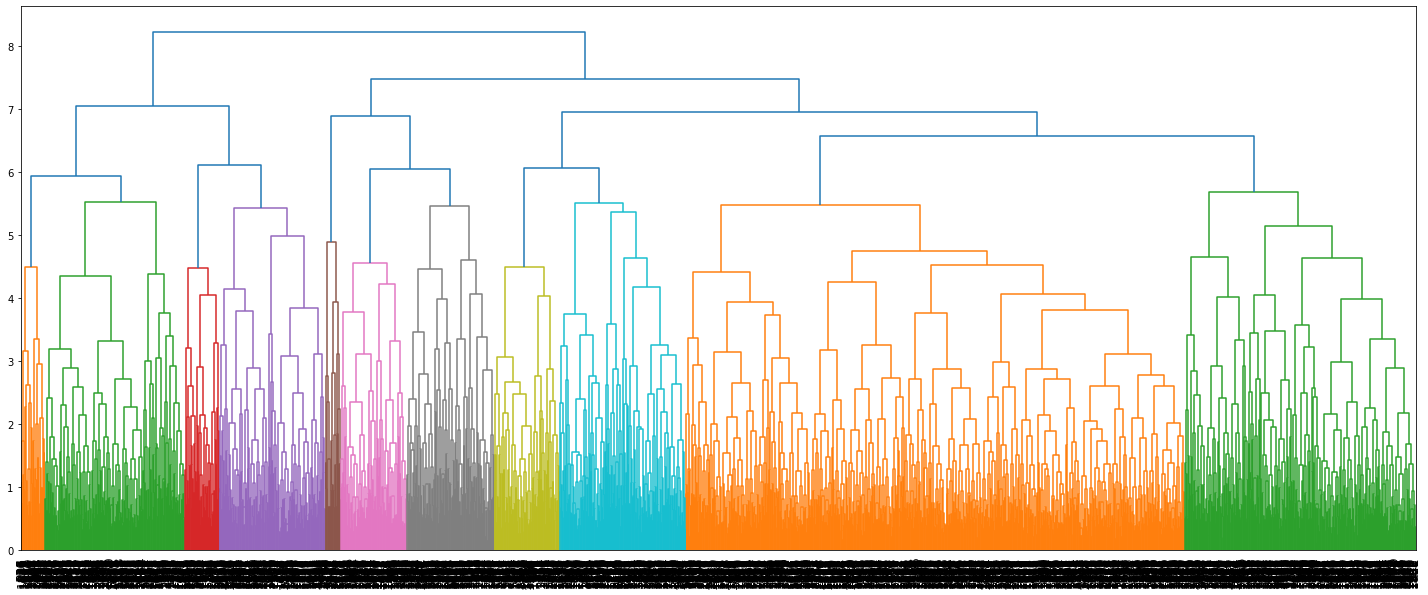

In [13]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

- [`fcluster`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)을 사용하여 덴드로그램 결과에 기반한 clustering을 진행
- 일반적으로는 (cophenetic)`'distance'` threshold(t)를 기준으로 구분
  - 이 외에도 inconsistent, maxclust, ... 등의 방식이 있음

In [14]:
cut_tree = fcluster(clusters, t=7, criterion='distance')    # t: 덴드로그램에서 클러스터를 찾을 높이
cut_tree

array([1, 4, 3, ..., 3, 3, 3], dtype=int32)

In [15]:
pd.Series(cut_tree).value_counts()

4    1542
3     283
1     275
2     235
dtype: int64

## Step 3. Evaluation
- 군집 내 비유사성 (within dissimilarities)는 작고 군집 간 비유사성 (between dissimilarities)는 크도록 생성
- 이 때, Silhouette coefficient (실루엣 계수)는 각 관측치와 주위 관측치과의 거리 계산을 통해 군집 내 비유사성과 군집 간 비유사성의 정도를 평가
  - 데이터 양이 많아질수록 time complexity가 높음


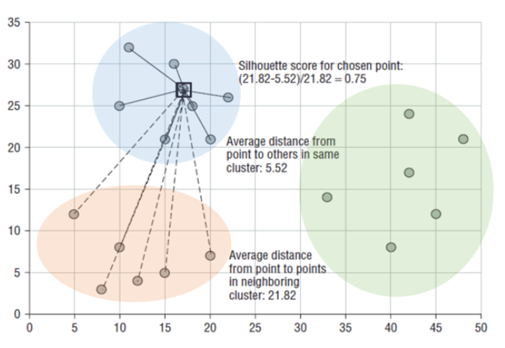
- [출처](https://ariz1623.tistory.com/224)

- `silhouette_samples`를 통해 coefficient를 계산, `silhouette_score`를 통해 모든 coefficient의 평균을 계산

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.26399624 0.04965367 0.02685061 0.23496799 0.11082033] 
Silhouette Score shape: (2335,) 

Silhouette Average Score:0.059


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  
1. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,hc_cluster,silhouette_coeff
0,-0.484757,0.087974,-1.512096,-0.981524,-1.882814,1,0.263996
1,0.088926,0.632650,-0.763428,-0.318530,-0.311154,4,0.049654
2,0.566265,0.344323,-0.000187,-1.053360,0.248836,3,0.026851
3,-0.219074,0.032717,-1.271806,0.013216,-1.276987,1,0.234968
4,-0.364378,0.452584,-0.103007,-1.144029,-0.858497,1,0.110820
...,...,...,...,...,...,...,...
2330,1.192595,1.276914,-0.168496,-0.098960,-1.108426,4,0.041472
2331,1.428117,-1.414563,-0.158201,-1.570383,0.505457,3,0.027685
2332,0.798209,0.265352,-0.746378,-0.486530,1.264070,3,-0.045137
2333,-0.247750,0.826233,0.926490,-1.455368,1.139852,3,0.096256


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.155768
2    0.082219
3    0.057706
4    0.038121
Name: silhouette_coeff, dtype: float64
표준편차: 0.05147475615133177


## Step 4. EDA

In [ ]:
# 군집별 통계(평균)
cluster_g = data_prime.groupby('hc_cluster')
cluster_g.mean()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,silhouette_coeff
hc_cluster,,,,,,
1,-0.202224,-0.476430,-0.354750,0.008229,-1.193593,0.155768
2,0.641531,-0.987144,0.818133,0.047872,0.429910,0.082219
3,-0.202057,-0.504072,-0.200515,-1.428871,0.369076,0.057706
4,-0.024621,0.327918,-0.024617,0.253474,0.079611,0.038121


In [ ]:
# 군집별 통계(표준편차)
cluster_g.std()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,silhouette_coeff
hc_cluster,,,,,,
1,0.961289,0.731722,1.000291,0.855926,0.599619,0.090031
2,0.898211,0.795442,0.797586,0.970096,1.129314,0.121418
3,0.873832,1.061641,1.110190,0.690878,1.062821,0.136505
4,1.005253,0.879968,0.939506,0.845658,0.858583,0.126445


- Cluster1: 개방적이지 않은(-O) 사람
- Cluster2: 신경질적(N)인데 외향적이지 않으며(-E) 성실한(C) 사람
- Cluster3: 외향적이지 않고(-E) 쾌활하지 않은(-A) 사람
- Cluster4: 큰 특징이 존재하지 않는 사람

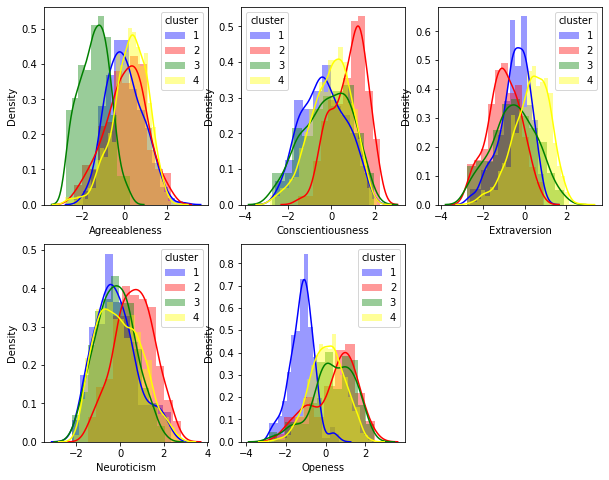

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) 
plt.subplot(2,3,1) 
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Agreeableness"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Agreeableness"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Agreeableness"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Agreeableness"], 
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,2) 
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Conscientiousness"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Conscientiousness"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Conscientiousness"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Conscientiousness"], 
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,3)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Extraversion"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Extraversion"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Extraversion"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Extraversion"], 
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,4)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Neuroticism"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Neuroticism"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Neuroticism"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Neuroticism"], 
             color="yellow", label=4)
plt.legend(title="cluster")

plt.subplot(2,3,5)
sns.distplot(data_prime[data_prime.hc_cluster == 1]["Openess"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.hc_cluster == 2]["Openess"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.hc_cluster == 3]["Openess"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.hc_cluster == 4]["Openess"], 
             color="yellow", label=4)
plt.legend(title="cluster")

plt.show()

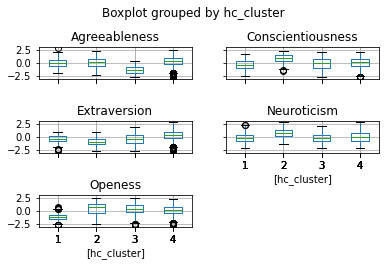

In [ ]:
# 시각화방법 2
import matplotlib.pyplot as plt
data_prime.drop('silhouette_coeff', axis=1).boxplot(by='hc_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

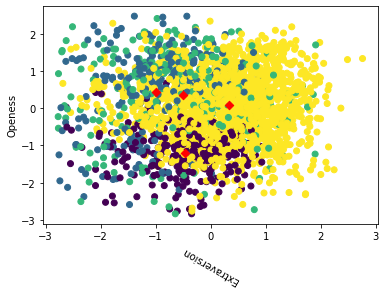

In [ ]:
# 시각화방법 3
plt.scatter(x=data_prime['Extraversion'], y=data_prime['Openess'], c=data_prime['hc_cluster']) # 각 cluster 좌푯값 시각화

hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
plt.scatter(x=hc_centers[:,1], y=hc_centers[:,4], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.xlabel('Extraversion', rotation=150)
plt.ylabel('Openess')
plt.show()

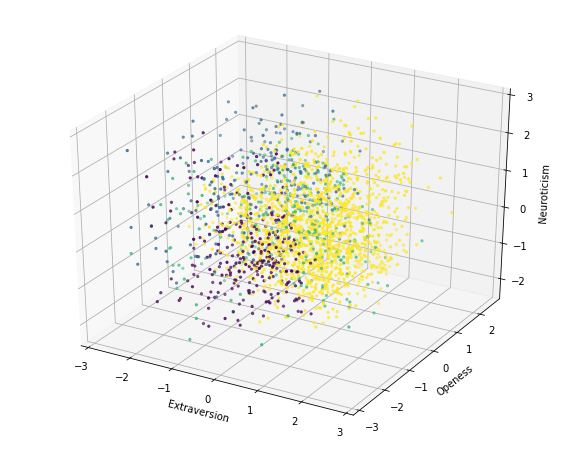

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(data_prime['Extraversion'], data_prime['Openess'], data_prime['Neuroticism'], s=5, c = data_prime['hc_cluster'])
ax.set_xlabel('Extraversion', rotation=150)
ax.set_ylabel('Openess')
ax.set_zlabel(r'Neuroticism', rotation=60)
plt.show()

- sklearn을 활용한 Agglomerative Clustering

In [ ]:
from time import time
import numpy as np
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(linkage='ward', n_clusters=10)
#n_clusters 클러스터 개수, 초기값 2
#affinity 거리 측정 방식, 기본값 euclidean
#linkage ward, complete, average, 기본값은 ward (ward는 거리가 euclidean에서 가능)

hclust.fit(X)
hclust.fit_predict(X)
hclust.get_params()
hclust.labels_	#각 자료에 대한 클러스터 결과

array([9, 5, 5, 5, 9, 3, 5, 9, 5, 5, 3, 5, 5, 5, 3, 3, 3, 9, 3, 9, 3, 9,
       5, 9, 5, 5, 9, 9, 9, 5, 5, 3, 3, 3, 5, 5, 3, 9, 5, 9, 9, 5, 5, 9,
       9, 5, 9, 5, 3, 9, 8, 6, 8, 0, 8, 0, 6, 7, 8, 0, 7, 6, 0, 6, 0, 8,
       0, 0, 2, 0, 6, 6, 2, 6, 6, 8, 8, 4, 6, 0, 0, 0, 0, 2, 0, 6, 8, 2,
       0, 0, 0, 6, 0, 7, 0, 0, 0, 6, 7, 0, 4, 2, 1, 4, 4, 1, 0, 1, 4, 1,
       4, 4, 4, 2, 2, 4, 4, 1, 1, 2, 4, 2, 1, 2, 4, 1, 2, 6, 4, 1, 1, 1,
       4, 2, 2, 1, 4, 4, 6, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 6])

In [ ]:
#반복문을 이용한 linkage 비교
type(X)
type(y)

import pandas as pd

X2 = pd.DataFrame(X)
X2 = X2.append(X2).append(X2).append(X2)
print(X2.shape)

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X2)
    print("%s : %.2fs" % (linkage, time() - t0))
    print(clustering.get_params())


(600, 4)
ward : 0.02s
{'affinity': 'euclidean', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'ward', 'memory': None, 'n_clusters': 10}
average : 0.01s
{'affinity': 'euclidean', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'average', 'memory': None, 'n_clusters': 10}
complete : 0.01s
{'affinity': 'euclidean', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'complete', 'memory': None, 'n_clusters': 10}


# k-평균 클러스터링 (K-means Clustering)
- Euclidean space를 가정
  1) 클러스터의 개수 k를 선정  
  2) 데이터셋에서 k개의 centroids를 임의로 지정  
  3) 각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당  
  4) 각 클러스터의 centroids 다시 계산 (일반적으로 유클리드 거리 사용)  
  5) 3, 4번 과정을 centroids가 더 이상 변하지 않을 때까지/지정된 횟수까지 반복  

- [한계
  - K 결정이 주관적
  - 여러 초기값이 동일 군집에 존재할 경우 최종 결과가 이상해질 수 있음
  - 크기가 작은 그룹에서는 제대로 작동하지 않을 수 있음
  - 반복 특성과 centroid를 random하게 초기화하기 때문에 local optimum에 고착, global optimum에 수렴되지 않을 수 있음

- Extensions
    - k-means에서 initial points로 비슷한 점들이 여러 개 선택되는 경우 불안정한 군집을 학습하게 됨 
    - `k-means++`: 1) 첫 initial point를 임의로 선택, 2) 이후의 initial points는 과거 initial points와 멀리 떨어지도록 분포를 조절하여 진행
        - 문서의 bag of words와 같이, 고차원의 sparse 데이터를 군집화하는 과정에서, 대부분의 데이터 간 거리가 유사할 경우 k-means++를 적용하는 것은 expensive한 버전의 random sampling을 수행하는 것과 같음
    - `SphericalKMeans`: k-means++가 가지는 한계를 완화하기 위해 등장. 2)에서 다음 initial points가 멀리 떨어지도록 조절하는 과정에서 거리가 threshold 이하인 점들을 제거 후 random하게 initial points 선택
    - k-medoid: 임의의 점으로 초기화하는 kmeans와 달리 특정 점을 medoid로 사용  
      - large data에 잘 먹지 않을 수 있음
    - fuzzy c-means clustering (soft clustering)


In [ ]:
data_prime = data.copy()

In [21]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5).fit(data_prime)
cluster.cluster_centers_    # 클러스터의 특징 해석, 행 단위: 클러스터, 열 단위: 변수
cluster.inertia_            # 군집 내 차이값 제곱의 합, 작을수록 좋다

for k in [4,6,8,10,12]:
  print(k, KMeans(n_clusters=k).fit(data_prime).inertia_)
  # k가 너무 커져도 안되니 중간에 감소세가 꺾이는 숫자를 k 값으로 선정하는게 좋음..

4 7793.952221351605
6 6635.235191110634
8 5985.102250119897
10 5478.102757035354
12 5069.209767748222


In [22]:
# 각 행이 어느 클러스터인지 확인
cluster.labels_

array([4, 1, 0, ..., 0, 2, 2], dtype=int32)

In [25]:
from sklearn.cluster import AgglomerativeClustering   # sklearn의 계층적 클러스터링
cl2 = AgglomerativeClustering(n_clusters=5).fit(data_prime)
cl2.labels_

array([3, 4, 4, ..., 4, 2, 2])

## Step 1. K 선정
1. EDA: 데이터의 형태를 살펴보고 manually 결정  
2. Elbow method: 클러스터의 개수를 늘려가며 SSE를 계산, SSE가 줄어드는 비율이 급격히 작아지는 부분을 elbow라 설정  
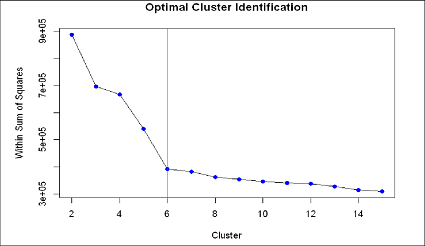
3. Silhouette score
4. Calinski Harabasz score: Variance Ratio Criterio이라고도 알려짐. between-clusters dispersion mean 과 within-cluster dispersion의 비율. 값이 높을수록 군집화가 잘 되었음을 의미

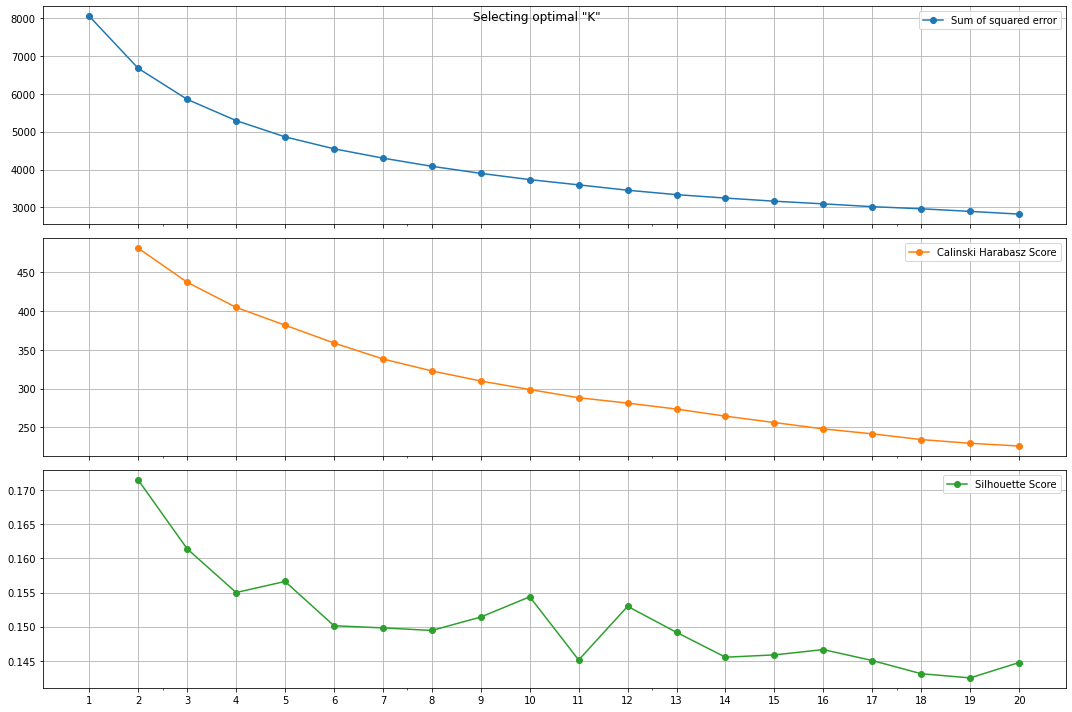

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

## Step 2. K-means clustering

In [ ]:
model = KMeans(n_clusters=5, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=5, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([3, 3, 4, ..., 4, 0, 2], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centers = model.cluster_centers_
pd.DataFrame(centers, columns = data.columns)

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.747647,0.422308,0.522702,0.355185,0.267290
1,0.102650,-0.217124,0.229613,-0.212094,-1.008630
2,0.174221,-1.005625,0.000890,-0.619786,0.587663
3,-0.331343,0.106151,-1.030252,0.252091,-0.126438
4,1.107615,0.445493,0.117704,0.227376,0.267516


## Step 3. Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.298


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.374405
1    0.232513
2    0.235741
3    0.279529
4    0.318423
Name: k_silhouette_coeff, dtype: float64

## Step 4. EDA

In [ ]:
# 군집별 통계
data_prime.groupby('k_means_cluster').mean()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,k_silhouette_coeff
k_means_cluster,,,,,,
0,-0.747647,0.422308,0.522702,0.355185,0.267290,0.374405
1,0.102650,-0.217124,0.229613,-0.212094,-1.008630,0.232513
2,0.174221,-1.005625,0.000890,-0.619786,0.587663,0.235741
3,-0.331343,0.106151,-1.030252,0.252091,-0.126438,0.279529
4,1.107615,0.445493,0.117704,0.227376,0.267516,0.318423


- Cluster0: 신경질적이지 않고(-N) 성실한(C) 사람
- Cluster1: 개방적이지 않은(-O) 사람
- Cluster2: 외향적이지 않고(-E) 쾌활하지 않은(-A) 사람
- Cluster3: 성실하지 않은(-C) 사람
- Cluster4: 신경질적인(N) 사람

In [ ]:
data_prime.groupby('k_means_cluster').std()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess,k_silhouette_coeff
k_means_cluster,,,,,,
0,0.515664,0.595511,0.491930,0.622350,0.593479,0.091253
1,0.751084,0.718431,0.675426,0.724939,0.475892,0.087392
2,0.771411,0.626666,0.745757,0.748576,0.654246,0.090274
3,0.651125,0.757420,0.514657,0.679503,0.698537,0.093927
4,0.548380,0.657630,0.743163,0.665218,0.624678,0.090962


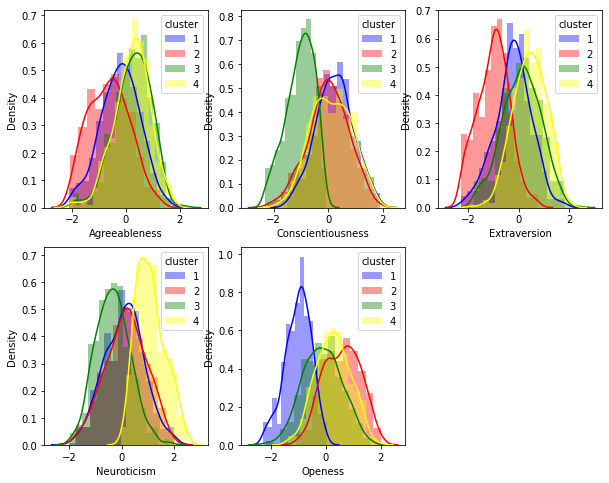

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) 
plt.subplot(2,3,1) 
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Agreeableness"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Agreeableness"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Agreeableness"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Agreeableness"], 
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,2) 
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Conscientiousness"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Conscientiousness"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Conscientiousness"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Conscientiousness"], 
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,3)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Extraversion"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Extraversion"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Extraversion"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Extraversion"], 
             color="yellow", label=4)
plt.legend(title="cluster")


plt.subplot(2,3,4)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Neuroticism"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Neuroticism"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Neuroticism"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Neuroticism"], 
             color="yellow", label=4)
plt.legend(title="cluster")

plt.subplot(2,3,5)
sns.distplot(data_prime[data_prime.k_means_cluster == 1]["Openess"], 
             color="blue", label=1)
sns.distplot(data_prime[data_prime.k_means_cluster == 2]["Openess"], 
             color="red", label=2)
sns.distplot(data_prime[data_prime.k_means_cluster == 3]["Openess"], 
             color="green", label=3)
sns.distplot(data_prime[data_prime.k_means_cluster == 4]["Openess"], 
             color="yellow", label=4)
plt.legend(title="cluster")

plt.show()

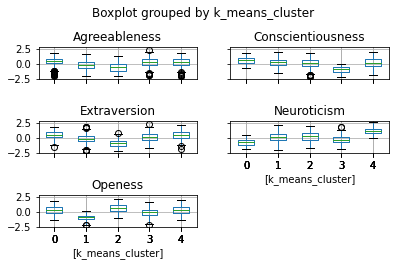

In [ ]:
# 시각화방법 2
data_prime.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

Text(0, 0.5, 'Agreeableness')

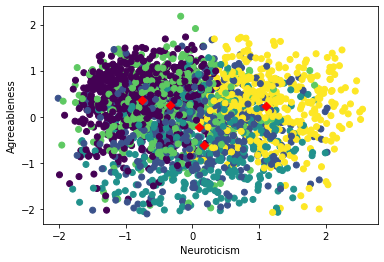

In [ ]:
# 군집결과 시각화
plt.scatter(x=data_prime['Neuroticism'], y=data_prime['Agreeableness'], c=data_prime['k_means_cluster'])
plt.scatter(x=centers[:,0], y=centers[:,3], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('Neuroticism')
plt.ylabel('Agreeableness')

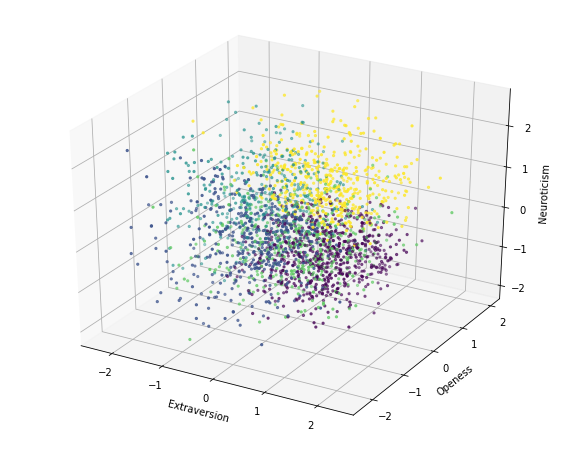

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(data_prime['Extraversion'], data_prime['Openess'], data_prime['Neuroticism'], s=5, c = data_prime['k_means_cluster'])
ax.set_xlabel('Extraversion', rotation=150)
ax.set_ylabel('Openess')
ax.set_zlabel(r'Neuroticism', rotation=60)
plt.show()

- K-means VS HC 간략화된 버전

In [ ]:
#1 K-means 클러스터링

import numpy as np
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

#n_clusters 클러스터의 개수, 기본은 8
#n_jobs 병렬 처리 개수
#algorithm: full(EM방식), elkan(효율적 방식), auto(dense 자료에 elkan, sparse에 full)

#사용 함수
kmeans.fit(X)	#클러스터링
kmeans.fit_predict(X)	#클러스터 중심 계산 후 각 샘플의 클러스터를 예측, kmeans.labels_와 동일
kmeans.get_params()	#파라미터 출력
kmeans.predict(X[0:5,])	#입력된 X값들이 어떤 클러스터에 속할 지 계산
kmeans.predict([[0, 0, 0, 0], [1,1,4, 4]])

kmeans.transform(X)[1,]	#클러스터 중심으로부터의 거리로 변환된 값
X[1,]

#결과 활용
kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_		#각 클러스터내에서 센터와 각 자료 사이 거리 합의 제곱

78.851441426146

In [ ]:
#CSV를 읽은 후 k-means 클러스터링
from pandas import read_csv
csv_data = read_csv("creditset.csv")	
print(csv_data.shape)
csv_data = csv_data[['income','age','loan']]	#2,3,4 열만 선택
print(csv_data.shape)

kmeans = KMeans(n_clusters=3)
kmeans.fit(csv_data)	#클러스터링
kmeans.predict(csv_data)
kmeans.get_params()
kmeans.inertia_

#반복문으로 클러스터 개수별 K-means 비교하기
for numcl in [3,6,9]:
	kmeans2 = KMeans(n_clusters=numcl)
	kmeans2.fit(csv_data)
	print(kmeans2.inertia_)

#정규화:데이터 크기를 변환
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(csv_data)

for numcl in [3,6,9]:
	kmeans3 = KMeans(n_clusters=numcl)
	kmeans3.fit(scaled)
	print(kmeans3.inertia_)

(2000, 6)
(2000, 3)
59763507631.689186
26255996514.159966
16922248692.901917
209.13757627668826
117.38762293325634
87.22876060281251


 - HC VS KM

In [ ]:
from pandas import read_csv
data = read_csv("data_1_2.csv")	
csv_data = data.iloc[:,0:5]
print(csv_data.shape)

#K-means
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(csv_data)


from sklearn.cluster import KMeans
for numcl in [2,4,6,8]:
	kmeans = KMeans(n_clusters=numcl)
	kmeans.fit(scaled)
	print(kmeans.inertia_)

kmeans = KMeans(n_clusters=8)
kmeans.fit(scaled)
kmeans.cluster_centers_

#H-clustering
hclust = AgglomerativeClustering(linkage='ward', n_clusters=2)
hclust.fit(csv_data)
hclust.get_params()
hclust.labels_	#각 자료에 대한 클러스터 결과 출력



(19225, 5)
806.1197907641343
305.8512539650668
183.46740698769747
135.3430874350957


array([0, 1, 0, ..., 0, 0, 0])

 - Clustering + 시각화

(546, 6)
102.19039388482622
63.56451643130919
50.83339268226632
42.6389661330589


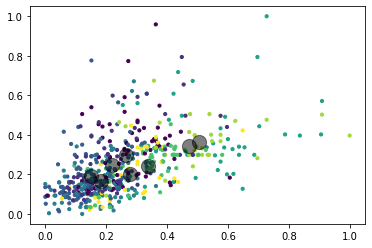

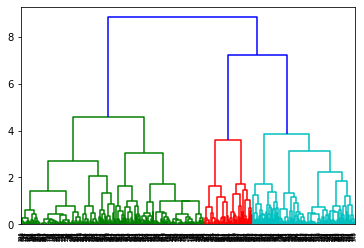

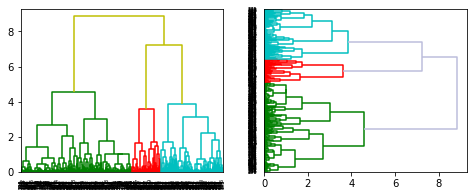

In [ ]:
#클러스터링 시각화
from pandas import read_csv
data = read_csv("housing.csv")	
csv_data = data.loc[:, ['price', 'lotsize', 'bedrooms', 'bathrms', 'stories','garagepl'] ]
print(csv_data.shape)

#1 Kmeans 시각화
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans

min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(csv_data)

for numcl in [2,4,6,8]:
	kmeans = KMeans(n_clusters=numcl)
	kmeans.fit(scaled)
	print(kmeans.inertia_)

kmeans = KMeans(n_clusters=8)
kmeans.fit(scaled)
kmeans.cluster_centers_

#matplotlib으로 시각화
scaled_df = pd.DataFrame(scaled, columns=csv_data.columns)
plt.scatter(scaled_df['price'], scaled_df['lotsize'], c=kmeans.predict(scaled_df), s=10 )
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

#2 HC 시각화 with scipy
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

Z = hierarchy.linkage(scaled, 'ward')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top')
dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right')
plt.show()

- MNIST+Clustering

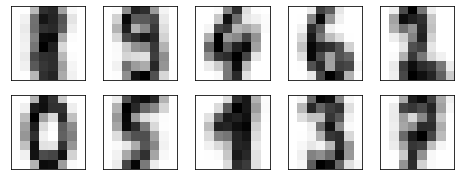

In [ ]:
# 숫자 이미지 K-means
#MNIST digit 샘플 데이터
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

#0~9의 숫자이므로 10개 군집
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

# 시각화
fig, ax = plt.subplots(2, 5, figsize=(8, 3))	#10개의 그림을 2행5열로 표시
centers = kmeans.cluster_centers_.reshape(10, 8, 8)	#10개 숫자, 각 그림 픽셀 (8 by 8)로 shape 변경

#표시
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()


# 3. Association Rule Mining

- **연관규칙분석, 장바구니분석** (Association Rule Analysis, Market Basket Analysis)
  - 비지도학습: 정답(target)이 없음, 평가가 없음
  - 고객의 대규모 거래 데이터(트랜잭션)로부터 함께 구매가 발생하는 규칙(예: A -> B)을 도출하여, 고객이 특정 상품 구매 시 이와 연관성 높은 상품을 추천  
  - 거래(transaction)와 항목(item)으로 구성되어 있는 경우  
  - 상품 간의 관련성(방향성)을 고려할 수 있음 => 키워드 간의 관계를 고려하는 데에도 사용  

- 방법
  - Join based: 최소 support threshold 이상인 경우 더 큰 itemset으로 확장
    - Apriori: breadth-first search로 계산이 expensive
  - Tree based: depth-first order을 통해 itemsets를 탐색
  - Pattern growth: 현재 frequent patterns에 기반하여 확장
    - FP-growth: depth-first search로, apriori에 비해 속도가 빠르며 메모리 효율적 사용

- 장점
  - 분석을 위한 복잡한 가정이 필요하지 않으므로 사전 지식이 부족해도 다양한 패턴을 도출 가능
  - 다양한 목적에 맞게 분석을 응용하여 쓸 수 있기 때문에 여러 도메인에서 활용됨

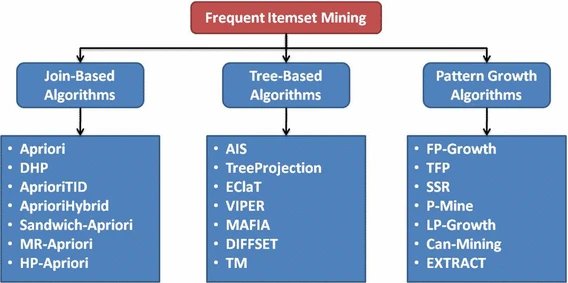

## Step 1. Import the necessary libraries
- `mlxtend`: Machine learning extensions. Machine learning에 사용하는 알고리즘들을 제공하는 파이썬 라이브러리로, 연관규칙 분석 시 사용하는 함수도 포함

In [27]:
!pip install mlxtend    # 머신러닝 extend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder  # 숫자로 변환
from mlxtend.frequent_patterns import apriori, association_rules

## Step 2. Import the dataset
- dataset: Chipotle.tsv from [Kaggle](https://www.kaggle.com/navneethc/chipotle)

In [29]:
import pandas as pd
df = pd.read_csv("chipotle.tsv", delimiter='\t', header=0)

In [30]:
df.head() # 각 order의 내용 (item)에 대한 dataframe

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


## Step 3. Preprocess the dataset to appropriate form for association rule mining
- `mlxtend`에서 제공하는 [`TransactionEncoder`](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/)을 사용하여 list 형식으로 구성된 거래 데이터를 2차원 numpy array로 변경  
1) orders로 이루어진 DataFrame을 nested list (장바구니) 형태로 변경
   - order_id가 동일한 item_name을 하나의 리스트로 묶음
   - 이 때, apriori 알고리즘의 정의에 의해, 중복된 연관 규칙은 제거할 필요가 있음

In [31]:
df_tmp = df.groupby('order_id')['item_name'].apply(set).apply(list).to_list()   # transaction 리스트로 표현
print(df_tmp[:10])

[['Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Fresh Tomato Salsa', 'Izze'], ['Chicken Bowl'], ['Side of Chips', 'Chicken Bowl'], ['Steak Soft Tacos', 'Steak Burrito'], ['Chips and Guacamole', 'Steak Burrito'], ['Chicken Soft Tacos', 'Chicken Crispy Tacos'], ['Chicken Bowl', 'Chips and Guacamole'], ['Chips and Tomatillo-Green Chili Salsa', 'Chicken Burrito'], ['Canned Soda', 'Chicken Burrito'], ['Chicken Bowl', 'Chips and Guacamole']]


2) nested list (장바구니)를 association rule을 찾기 위한 dataframe의 형태로 변경
  - Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array

In [32]:
te = TransactionEncoder()   # 범주형 데이터를 숫자로 만들어줌
te_ary = te.fit_transform(df_tmp) # df_tmp를 장바구니 형태로 변경 (fit과 transform을 동시에 진행)
print(te_ary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [34]:
df = pd.DataFrame(te_ary, columns=te.columns_) # label 정보는 te.columns_에 저장되어 있으므로, 해당 값을 칼럼명으로 하는 데이터 프레임으로 변경.
df.head()
df.shape

(1834, 50)

## Step 4. Association rule mining
- 연관분석 함수(`apriori, association_rules`)를 사용하여 분석 진행  
  - 지지도(support): 범용성 0.1
    - rule의 조건이 일어날 확률
    - 전체 중에서 상품 A가 몇 번이나 판매되었는가  
  $s(X→Y)=P(X \cap Y)$  

  - 신뢰도(confidence) 0.7
    - rule의 조건이 일어났을 때, 결과가 발생할 확률
    - A를 구입한 주문 중 B도 동시에 구입한 주문 수  
  $c(X → Y)=\frac{P(X \cap Y)}{P(X)}=P(B|A)$  

  - 향상도(lift) 
    - 조건과 결과가 각각 독립적이라고 가정할 경우보다 얼마나 더 좋은지를 평가
    - 두 상품의 관계를 직접적으로 나타낸 것  
   $Lift(X, Y)=\frac{P(A \cap B)}{P(A) \times P(B)}=\frac{P(B|A)}{P(B)}$  
    - X가 기본 아이템일 경우 항상 confidence가 1이 나오는 경우 두 아이템 간 관계를 파악할 수 없으므로 향상도를 비교

- 일반적으로 association rule을 사용하여 분석할 때는 다음과 같은 과정을 거침  
    1) 특정 지지도 이상인 set을 찾음  
    2) 해당 set의 조합으로 만들 수 있는 rule 중 신뢰도 이하의 rule을 screening out   
    3) 향상도를 정렬하여 rule을 평가

- 해석 시 유의할 점
  - item의 선/후 혹은 인과 관계는 알 수 없음
  - item별 수량은 고려되지 않음

- Apriori Algorithm 활용
- 빈번하게 발생하는 아이템 셋에 대해서만 계산 (minimum support를 넘지 못하는 아이템을 포함하는 모든 아이템셋은 minimum support를 넘지 못함)
1. Support
- Minimum support를 지정하여, 등장 횟수가 일정 비율 이상의 아이템 set만 선정
  - 1) 각 item들에 대해 지지도를 계산 후 minimum 지지도가 넘는 items를 선정
  - 2) 1에서 구한 items들의 2개 조합으로 구성한 set을 생성 후 지지도 계산 (minimum 이상)
  - 3) 2에서 구한 set들의 조합으로, 3개의 item으로 구성된 항목에 대해 지지도 계산
  - 4) minimum 값을 넘는 조합이 없을 때까지 조합에 포함되는 item 개수를 늘려줌

In [35]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True) # 여기서는 0.05를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)    # support 내림차순으로 sorting

,support,itemsets
3,0.335333,(Chicken Bowl)
4,0.266630,(Chicken Burrito)
9,0.258451,(Chips and Guacamole)
12,0.186478,(Steak Burrito)
2,0.150491,(Canned Soft Drink)
7,0.113413,(Chips)
11,0.102508,(Steak Bowl)
0,0.083969,(Bottled Water)
15,0.081243,"(Chicken Bowl, Chips and Guacamole)"
14,0.066521,"(Chips, Chicken Bowl)"


- Chicken Bowl을 주문하는 경우가 많다. (support = 0.335333)
- Chicken Bowl, Chips and Guacamole를 같이 구매한 경우가 많다. (support = 0.081243)

2. Confidence
- 앞서 선정한 items (많이 구매된 메뉴)을 사용하여 함께 구매된 items를 확인
- antecedents (조건절), consequents (결과절): Antecedents를 구매했을 때 consequents를 구매


In [37]:
patterns = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
patterns.sort_values(by = ['confidence', 'lift', 'support'], ascending=False) # 최소 confidence를 0.1로 지정

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
1,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
5,(Chips and Guacamole),(Chicken Bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392
4,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
6,(Chips and Guacamole),(Chicken Burrito),0.258451,0.266630,0.062159,0.240506,0.902022,-0.006752,0.965603
7,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
3,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
0,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604


In [38]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True) # 최소지지도 0.01를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)    # support 내림차순으로 sorting

,support,itemsets
10,0.335333,(Chicken Bowl)
11,0.266630,(Chicken Burrito)
17,0.258451,(Chips and Guacamole)
26,0.186478,(Steak Burrito)
6,0.150491,(Canned Soft Drink)
...,...,...
36,0.010905,"(Bottled Water, Canned Soft Drink)"
68,0.010360,"(Chicken Salad Bowl, Chips and Guacamole)"
32,0.010360,"(6 Pack Soft Drink, Chicken Burrito)"
22,0.010360,(Chips and Tomatillo-Red Chili Salsa)


In [39]:
patterns = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
patterns.sort_values(by = ['lift'], ascending=False) # 최소 신뢰도(confidence)를 0.2로 지정하여 lift 기준 정렬

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,"(Bottled Water, Chicken Bowl)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011000,1.492061
39,"(Chicken Bowl, Canned Soft Drink)",(Chips),0.060523,0.113413,0.019084,0.315315,2.780232,0.012220,1.294883
35,"(Chips, Chicken Bowl)",(Bottled Water),0.066521,0.083969,0.015267,0.229508,2.733234,0.009681,1.188891
34,"(Chips, Bottled Water)",(Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,0.008868,3.323337
7,(Canned Soda),(Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,0.010071,1.318467
5,(Bottled Water),(Chips),0.083969,0.113413,0.019084,0.227273,2.003934,0.009561,1.147347
37,"(Chips, Chicken Bowl)",(Canned Soft Drink),0.066521,0.150491,0.019084,0.286885,1.906332,0.009073,1.191266
18,(Chips and Tomatillo Red Chili Salsa),(Chicken Bowl),0.025082,0.335333,0.015812,0.630435,1.880028,0.007402,1.798512
11,(Canned Soft Drink),(Chips),0.150491,0.113413,0.031625,0.210145,1.852912,0.014557,1.122468
10,(Chips),(Canned Soft Drink),0.113413,0.150491,0.031625,0.278846,1.852912,0.014557,1.177986


- Chips를 산 사람들 중 Chicken Bowl을 산 경우가 많았다 (Confidence = 0.586538)
- Canned Soft Drink를 산 사람들 중 Chicken Bowl을 산 경우가 많았다 (confidence = 0.402174)
- Chips and Guacamole을 산 사람이 Chicken Bowl을 살 확률 (confidence = 0.314346) > Chicken Bowl을 산 사람이 Chips and Guacamole을 살 확률 (confidence = 0.242276)

3. Lift
- 1보다 클 경우 A를 샀을 때 B을 살 확률이 높아지는 것을 의미
- 1보다 작을 경우 A를 샀을 때 B을 사지 않을 확률이 높은 것을 의미  


In [ ]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by = [ 'lift', 'confidence', 'support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
3,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
1,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604
0,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807


Chips를 주문한 고객이 Chicken bowl을 주문할 확률에는 양의 상관관계가 있음 (lift = 1.749124)

- 지지도, 신뢰도 등의 minimum threshold를 결정할 때 주관성이 들어갈 수 있음
- 목적에 따라 중요하게 판단할 기준이 다를 수 있음
  - 신뢰도가 동일하다고 했을 때, 소비자노출이 중요하다면 지지도가 높은 Rule이, 노출 대비 소비자 반응률(구매여부)이 중요한 경우 향상도가 높은 Rule이 더 좋은 규칙

- 데이터 유형별 AR 적용

In [ ]:
#1. 리스트 형태로 표현된 Transaction 처리
dataset = [['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
           ['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

type(dataset)

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary
df = pd.DataFrame(te_ary, columns=te.columns_)
df

#apriori
#입력: pandas DataFrame, min_support 기본값0.5, use_colnames 기본값 False, max_len 기본값 none

apriori(df, min_support=0.6)
apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

#필터링을 위해  length column 추가
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.6) ]

#association_rules
#입력: dataframe
#metric: confidence(기본값), lift 등
#min_threshold: 설정된 metric으로 필터링, 0.8(기본값)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)


#결과 중 filtering
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2) & (rules['confidence'] > 0.75) & (rules['lift'] > 1.2) ]


#-----------------------------------------------------#
#2. csv/엑셀로 부터 transaction 읽은 후 association rule
#출처: UCI machine learning databases
df = pd.read_excel('OnlineRetail2.xlsx')
df.head()

#자료 정리
df['Description'] = df['Description'].str.strip()	#Description 컬럼의 문자열 전후 공백 정리	
df['InvoiceNo'] = df['InvoiceNo'].astype('str')		#InvoiceNo을 문자열로 변경
df = df[~df['InvoiceNo'].str.contains('C')]		#InvoiceNo 중 정상적이지 않은 거래 건(C문자 포함 거래) 제외

#apriori에 적용할 데이터 형태로 변경
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
# 두 컬럼을 기준으로 Quantity값을 정리/ 합계구하고, 형태 변환 / index새로 생성/NaN값은0변환 / InvoiceNo으로 index 설정

#다른 방식으로 처리
#df.drop_duplicates('InvoiceNo', inplace=True) 
#df.pivot(index="InvoiceNo", columns="Description", values="Quantity").fillna(0) 

#binarize
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

type(basket)

#전체 자료에 함수 적용
basket_sets = basket.applymap(encode_units)
basket_sets.columns

#불필요한 컬럼 제거
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.drop('amazon', inplace=True, axis=1)
basket_sets.drop('check', inplace=True, axis=1)
basket_sets.drop('faulty', inplace=True, axis=1)
basket_sets.drop('damages', inplace=True, axis=1)
type(basket_sets)


#apriori
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]

#-----------------------------------------------------#
# 3. 음악 콘텐츠 관련 Transaction 처리
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

df = pd.read_csv('data_3.csv')
df.head()

df['artist'] = df['artist'].str.strip()		
df.dropna(axis=0, subset=['user'], inplace=True)
df['user'] = df['user'].astype('str')		

basket=df.groupby(['user', 'artist'])['qty'].sum().unstack().reset_index().fillna(0).set_index('user')

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.columns

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(radiohead),(coldplay),0.201780,0.149357,0.065282,0.323529,2.166147,0.035145,1.257472
1,(coldplay),(radiohead),0.149357,0.201780,0.065282,0.437086,2.166147,0.035145,1.418014
2,(the beatles),(radiohead),0.190900,0.201780,0.071217,0.373057,1.848827,0.032697,1.273193
3,(radiohead),(the beatles),0.201780,0.190900,0.071217,0.352941,1.848827,0.032697,1.250427


# 4. Graph

- structure: node(vertex; entity), edge(link; relation; predicate), attribute(각각의 노드와 엣지가 갖는 특성을 정리한 것)
- input data: edgelist/adjacency matrix
- network 종류
  - directed v.s. undirected: 방향성의 여부
  - weighted v.s. unweighted: edge의 weight
  - multi-relational: relation type의 개수 (`nx.MultiGraph()`, `nx.MultiDiGraph()`)
  - bipartite graph (이분 그래프): 정점을 2그룹으로 나눌 수 있으되 같은 그룹의 정점끼리는 간선으로 이어지지 않은 경우
    - 학생 - 수업: 학생들이 어떤 수업을 듣고 있는지
    - 유저 - 선호 영화: 각 유저가 어떠한 영화를 선호하는지
    - 구직자 - 선호 회사: 각 구직자가 어떠한 회사를 선호하는지

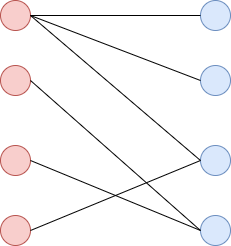

- Software: [Gephi](https://gephi.org/), [Ucinet](https://sites.google.com/site/ucinetsoftware/home), R (igraph), Python (networkx), nodeXL

# Step 1. Graph
- `networkx`를 통해 다양한 유형의 네트워크를 생성할 수 있음
  - `nx.Graph()`: undirected graph
  - `nx.DiGraph()`: directed graph

## 1) From Scratch (Edgelist)

In [55]:
Fruits = ['apple', 'banana', 'kiwi', 'mango']
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]

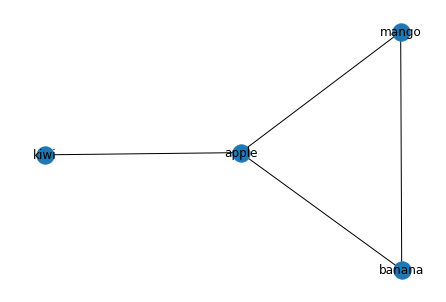

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph 생성
G = nx.Graph()

# Node (vertex) 생성
G.add_nodes_from(Fruits)

# Edge (link) 생성
G.add_edges_from(relations)  # graph에 속한 모든 node들이 edgelist에 포함된 경우 add_nodes_from() 과정을 생략할 수 있음

nx.draw(G, with_labels=True)
plt.show()

In [57]:
print('Nodes:', G.nodes)
print('Number of nodes:', nx.number_of_nodes(G))
print('Edges:', G.edges)
print('Number of nodes:', nx.number_of_edges(G))

Nodes: ['apple', 'banana', 'kiwi', 'mango']
Number of nodes: 4
Edges: [('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')]
Number of nodes: 4


In [58]:
print(nx.info(G))

Graph with 4 nodes and 4 edges


- degree: node와 연결된 모든 edge의 수

In [59]:
degree = nx.degree(G)
print(degree)

[('apple', 3), ('banana', 2), ('kiwi', 1), ('mango', 2)]


In [60]:
print(list(G.neighbors('banana')))

['apple', 'mango']


- Directed graph의 경우 다음과 같이 생성 가능

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

# 방향이 있는 네트워크 생성
G_directed = nx.DiGraph()

G_directed.add_nodes_from(Fruits)
G_directed.add_edges_from(relations)

In [62]:
in_degree = G_directed.in_degree()
out_degree = G_directed.out_degree()
print('in-degree:', in_degree)
print('out-degree:', out_degree)

in-degree: [('apple', 2), ('banana', 2), ('kiwi', 0), ('mango', 0)]
out-degree: [('apple', 1), ('banana', 0), ('kiwi', 1), ('mango', 2)]


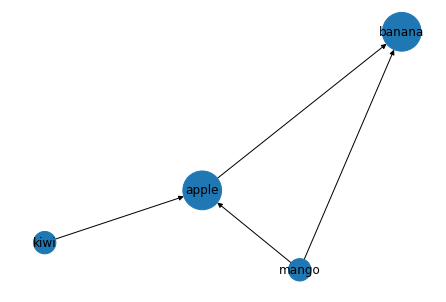

In [64]:
# 시각화 (degree가 클수록 원의 크기도 크도록)
nx.draw(G_directed, node_size=[500 + v[1]*500 for v in in_degree], with_labels=True)

## 2) From Scratch (Adjacency matrix)

In [65]:
# Adjacency matrix
A = nx.to_numpy_matrix(G)
print(A)

[[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]


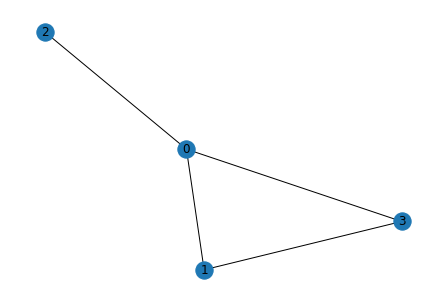

{0: 'apple', 1: 'banana', 2: 'kiwi', 3: 'mango'}


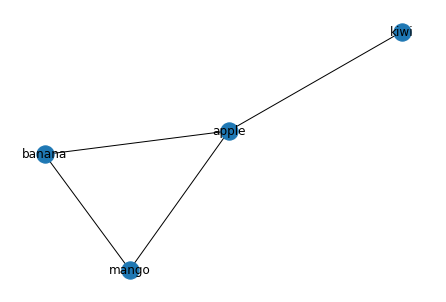

In [66]:
G_Adjacency=nx.from_numpy_matrix(A) # node label이 지정되지 않은 상태 (0, 1, 2, ...)
nx.draw(G_Adjacency, with_labels=True)
plt.show()

mapping = {i: f for i, f in enumerate(Fruits)}
print(mapping) # 변경할 label 형태

H = nx.relabel_nodes(G_Adjacency, mapping)
nx.draw(H, with_labels=True)
plt.show()

## 3) From Dataset

In [40]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
import pandas as pd 
data = pd.read_csv('asoiaf-all-edges.csv')

In [42]:
data # undirected, weighted, edgelist

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [43]:
df = data[['Source', 'Target', 'weight']]
df.drop_duplicates(subset=['Source', 'Target', 'weight'], inplace=True) # 중복 제거

In [44]:
df

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,4
2819,Waymar-Royce,Will-(prologue),18
2820,Weasel,Weese,6
2821,Woth,Yoren,4


In [45]:
'''
https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

source = A valid column name (string or integer) for the source nodes (for the directed case)
target = A valid column name (string or integer) for the target nodes (for the directed case)
* directed인 경우 source -> target, undirected인 경우 source와 target의 source - target

edge_attr = A valid column name (str or int) or iterable of column names that are used to retrieve items and add them to the graph as edge attributes.
            If True, all of the remaining columns will be added. If None, no edge attributes are added to the graph.
'''

G_data = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='weight')

# # directed graph의 경우 create_using=nx.DiGraph() 설정
# G = nx.from_pandas_edgelist(df,  source='Source', target='Target', edge_attr='weight', create_using=nx.DiGraph())

- Node: 왕좌의 게임의 인물
- Edge: 인물들 간의 친밀도

In [49]:
print(nx.info(G_data))

Graph with 796 nodes and 2823 edges


In [50]:
G_data.nodes

NodeView(('Addam-Marbrand', 'Brynden-Tully', 'Cersei-Lannister', 'Gyles-Rosby', 'Jaime-Lannister', 'Jalabhar-Xho', 'Joffrey-Baratheon', 'Kevan-Lannister', 'Lyle-Crakehall', 'Oberyn-Martell', 'Tyrion-Lannister', 'Tywin-Lannister', 'Varys', 'Aegon-Frey-(son-of-Stevron)', 'Catelyn-Stark', 'Robb-Stark', 'Stevron-Frey', 'Walder-Frey', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Eddard-Stark', 'Harren-Hoare', 'Nan', 'Rhaenys-Targaryen', 'Stannis-Baratheon', 'Torrhen-Stark', 'Visenya-Targaryen', 'Aegon-Targaryen-(son-of-Rhaegar)', 'Elia-Martell', 'Franklyn-Flowers', 'Haldon', 'Harry-Strickland', 'Jon-Connington', 'Lemore', 'Rhaegar-Targaryen', 'Rhaenys-Targaryen-(daughter-of-Rhaegar)', 'Rolly-Duckfield', 'Viserys-Targaryen', 'Yandry', 'Ysilla', 'Aegon-V-Targaryen', 'Aemon-Targaryen-(Maester-Aemon)', 'Aemon-Targaryen-(Dragonknight)', 'Alleras', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Cotter-Pyke', 'Daeron-II-Targaryen', 'Dareon', 'Denys-Mallister', 'Donal-Noye', 'Eddison-Tollett',

In [51]:
G_data.edges

EdgeView([('Addam-Marbrand', 'Brynden-Tully'), ('Addam-Marbrand', 'Cersei-Lannister'), ('Addam-Marbrand', 'Gyles-Rosby'), ('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Jalabhar-Xho'), ('Addam-Marbrand', 'Joffrey-Baratheon'), ('Addam-Marbrand', 'Kevan-Lannister'), ('Addam-Marbrand', 'Lyle-Crakehall'), ('Addam-Marbrand', 'Oberyn-Martell'), ('Addam-Marbrand', 'Tyrion-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Addam-Marbrand', 'Varys'), ('Brynden-Tully', 'Arya-Stark'), ('Brynden-Tully', 'Catelyn-Stark'), ('Brynden-Tully', 'Daven-Lannister'), ('Brynden-Tully', 'Edmure-Tully'), ('Brynden-Tully', 'Edwyn-Frey'), ('Brynden-Tully', 'Emmon-Frey'), ('Brynden-Tully', 'Hoster-Tully'), ('Brynden-Tully', 'Jaime-Lannister'), ('Brynden-Tully', 'Lyle-Crakehall'), ('Brynden-Tully', 'Lysa-Arryn'), ('Brynden-Tully', 'Nestor-Royce'), ('Brynden-Tully', 'Rickard-Karstark'), ('Brynden-Tully', 'Robb-Stark'), ('Brynden-Tully', 'Ryman-Frey'), ('Brynden-Tully', 'Theon-Greyjoy'), ('Brynden-Tu

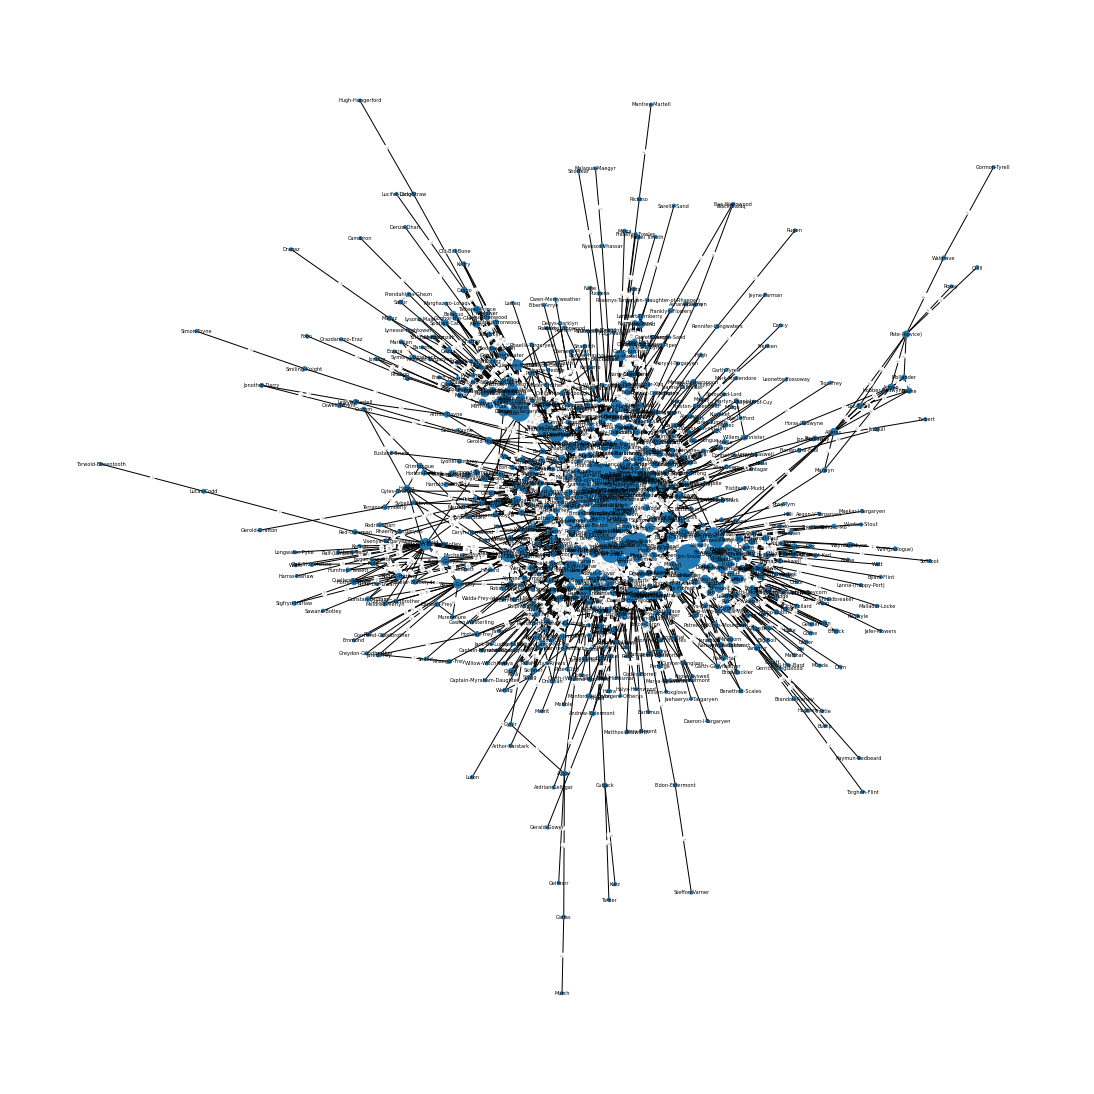

In [52]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data)
pos=nx.spring_layout(G_data)
nx.draw(G_data, pos, with_labels=True, node_size=[5 + v[1]*5 for v in degree], font_size = 5) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G_data, 'weight')
nx.draw_networkx_edge_labels(G_data, pos, edge_labels = edge_weight, alpha=0.6, font_size=3) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

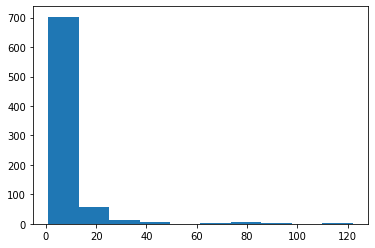

In [53]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

# Step 2. Attribute

## 1) Edge attribute (weight)

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

G_weighted = nx.Graph()
G_weighted.add_nodes_from(Fruits)

In [68]:
# Case 1
weighted_relations = [('apple', 'banana', {'weight': 7}), ('kiwi', 'apple', {'weight': 4}), ('mango', 'apple', {'weight': 3}), ('mango', 'banana', {'weight': 5})]
G_weighted.add_edges_from(weighted_relations)
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 7}), ('apple', 'kiwi', {'weight': 4}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 5})]


In [69]:
# Case 2
G_weighted['apple']['banana']['weight']=5
G_weighted['apple']['kiwi']['weight']=2
G_weighted['apple']['mango']['weight']=3
G_weighted['banana']['mango']['weight']=4
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 5}), ('apple', 'kiwi', {'weight': 2}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 4})]


In [70]:
nx.to_numpy_matrix(G_weighted)

matrix([[0., 5., 2., 3.],
        [5., 0., 0., 4.],
        [2., 0., 0., 0.],
        [3., 4., 0., 0.]])

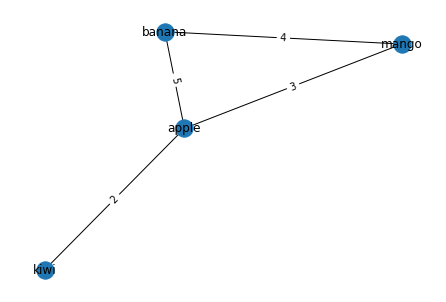

In [71]:
labels = nx.get_edge_attributes(G_weighted, 'weight')

pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)

plt.show()

In [72]:
print('전체 shortest path:\n',nx.shortest_path(G))
print('banana to kiwi:',nx.shortest_path(G, 'banana', 'kiwi'))
# print('banana to kiwi:',nx.shortest_path(G_weighted, 'banana', 'kiwi', weight='weight')) # 여러 route가 있을 때 weight을 고려하여 shortest path 계산

전체 shortest path:
 {'apple': {'apple': ['apple'], 'banana': ['apple', 'banana'], 'kiwi': ['apple', 'kiwi'], 'mango': ['apple', 'mango']}, 'banana': {'banana': ['banana'], 'apple': ['banana', 'apple'], 'mango': ['banana', 'mango'], 'kiwi': ['banana', 'apple', 'kiwi']}, 'kiwi': {'kiwi': ['kiwi'], 'apple': ['kiwi', 'apple'], 'banana': ['kiwi', 'apple', 'banana'], 'mango': ['kiwi', 'apple', 'mango']}, 'mango': {'mango': ['mango'], 'apple': ['mango', 'apple'], 'banana': ['mango', 'banana'], 'kiwi': ['mango', 'apple', 'kiwi']}}
banana to kiwi: ['banana', 'apple', 'kiwi']


## 2) Node attribute

In [73]:
print('Attribute 부여하기 전:', G.nodes['kiwi'])

G.nodes['kiwi']['kind'] = 'fruit'
print('Attribute 부여한 후:', G.nodes['kiwi'])

print(G.nodes(data=True))

Attribute 부여하기 전: {}
Attribute 부여한 후: {'kind': 'fruit'}
[('apple', {}), ('banana', {}), ('kiwi', {'kind': 'fruit'}), ('mango', {})]


In [74]:
G.add_nodes_from(Fruits, kind='fruit') # kind라는 attribute에 fruit 값 추가
print(G.nodes(data=True))

[('apple', {'kind': 'fruit'}), ('banana', {'kind': 'fruit'}), ('kiwi', {'kind': 'fruit'}), ('mango', {'kind': 'fruit'})]


# Step 3. Graph 분석

## 1) Structure
- diameter: 네트워크에서 가장 멀리 연결된 pair의 거리
  - 모든 노드 쌍에 대해 Shortest Path를 계산 후, 그 중 가장 큰 값을 가지는 Path의 길이
- density: 모든 edge의 개수와 실제 edge 수(k)의 비
  - undirected: $k/n(n-1)/2$
  - directed: $k/n(n-1)$
- reciprocity: 주고 받는 비율 (i.e., A가 B를 친구로 지명하였을 때, B가 A를 친구로 지명) 
  - directed graph에서만 의미가 있음
- transitivity: 3 이상의 관계에서 연결된 비율 (i.e., A가 B를 친구로 지명하고, B는 C를 친구로 지명했을 때, A가 C를 친구로 지명)


In [75]:
print('diamter:', nx.diameter(G_data))
print('density:', nx.density(G_data))
print('transitivity:', nx.transitivity(G_data))
print('reciprocity:', nx.reciprocity(G_data))

diamter: 9
density: 0.008921968332227173
transitivity: 0.2090366938564282
reciprocity: 0.0


- directed graph의 경우

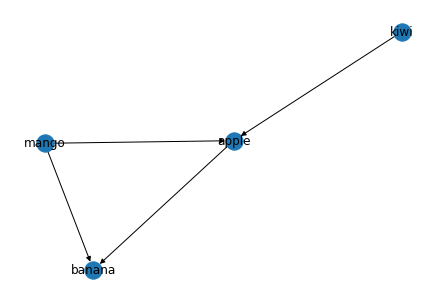

In [79]:
nx.draw(G_directed, with_labels=True)

In [80]:
'''
directed graph에서는 이동에 있어서 양방향을 모두 따지기 때문에 그냥 nx.diameter(G)를 할 경우 다음과 같은 오류 발생

NetworkXError: Found infinite path length because the digraph is not strongly connected
'''

print('diamter:', nx.diameter(nx.to_undirected(G_directed)))
print('density:', nx.density(nx.to_undirected(G_directed)))
print('transitivity:', nx.transitivity(G_directed))
print('reciprocity:', nx.reciprocity(G_directed))

diamter: 2
density: 0.6666666666666666
transitivity: 0.5
reciprocity: 0.0


## 2) Centrality
- Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가?
  - Normalized degree centrality: 표준화를 위해 전체를 N-1로 나눠줌
- Betweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가?
  - Broker 역할을 하는 node를 찾을 수 있음
  - $C_B(i)=\sum_{j<k}g_{jk}(i)/g_{jk}$ where $g_{jk}$: jk를 연결하는 geodesics 수, 그 중 $g_{jk}(i)$: node i가 포함되어있는 경우
  - Normalized betweeness centrality: $C_B^*(i)=\frac{C_B(i)}{\frac{(N-1)(N-2)}{2}}$
- Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)
  - 모든 다른 노드들과의 거리가 가장 가까운 노드가 중요한 노드
  - $C_C(i)=[\sum_{j=1}^{N-1}d(i,j)]^{-1}$
  - Normalized closness centrality: $C_C^*(i)=(N-1)C_C(i)$
- Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가? 
  - 연결된 이웃의 중요도에 가중치를 부여
  - $C_E(v_i) \propto\sum_{v_j \in N_i}A_{ij}C_E(v_j)$, $A\mathbf{x}=\lambda \mathbf{x}$

- 이 외에 Katz centrality, PageRank 

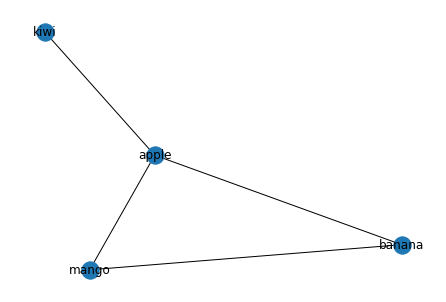

In [81]:
nx.draw(G, with_labels=True)

In [82]:
print('degree centrality:\n', nx.degree_centrality(G))
print('betweenness centrality:\n', nx.betweenness_centrality(G))
print('closeness centrality:\n', nx.closeness_centrality(G))
print('eigenvector centrality:\n', nx.eigenvector_centrality(G))

degree centrality:
 {'apple': 1.0, 'banana': 0.6666666666666666, 'kiwi': 0.3333333333333333, 'mango': 0.6666666666666666}
betweenness centrality:
 {'apple': 0.6666666666666666, 'banana': 0.0, 'kiwi': 0.0, 'mango': 0.0}
closeness centrality:
 {'apple': 1.0, 'banana': 0.75, 'kiwi': 0.6, 'mango': 0.75}
eigenvector centrality:
 {'apple': 0.6116286437343044, 'banana': 0.5227204550943347, 'kiwi': 0.28184579793865716, 'mango': 0.5227204550943347}


- 앞서 불러온 데이터셋을 사용하여 이후 실습을 진행

In [83]:
deg_cen = nx.degree_centrality(G_data)
bet_cen = nx.betweenness_centrality(G_data)
clo_cen = nx.closeness_centrality(G_data)
eig_cen = nx.eigenvector_centrality(G_data)

In [84]:
deg_cen   # 딕셔너리 형태로 제공됨

{'Addam-Marbrand': 0.01509433962264151,
 'Aegon-Frey-(son-of-Stevron)': 0.005031446540880503,
 'Aegon-I-Targaryen': 0.011320754716981131,
 'Aegon-Targaryen-(son-of-Rhaegar)': 0.018867924528301886,
 'Aegon-V-Targaryen': 0.0012578616352201257,
 'Aemon-Targaryen-(Dragonknight)': 0.0012578616352201257,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03270440251572327,
 'Aenys-Frey': 0.005031446540880503,
 'Aeron-Greyjoy': 0.018867924528301886,
 'Aerys-I-Targaryen': 0.0012578616352201257,
 'Aerys-II-Targaryen': 0.023899371069182388,
 'Aggar': 0.005031446540880503,
 'Aggo': 0.012578616352201257,
 'Alayaya': 0.005031446540880503,
 'Albett': 0.0037735849056603774,
 'Alebelly': 0.005031446540880503,
 'Alerie-Hightower': 0.0025157232704402514,
 'Alester-Florent': 0.00880503144654088,
 'Alla-Tyrell': 0.006289308176100628,
 'Allar-Deem': 0.0025157232704402514,
 'Allard-Seaworth': 0.0037735849056603774,
 'Alleras': 0.010062893081761006,
 'Alliser-Thorne': 0.018867924528301886,
 'Alyn': 0.006289308176100628,


In [ ]:
# 각 centrality별 가장 값이 높은 3개의 node 추출
print('degree centrality:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('betweenness centrality:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('closeness centrality:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality:
 [('Tyrion-Lannister', 0.15345911949685534), ('Jon-Snow', 0.14339622641509434), ('Jaime-Lannister', 0.1270440251572327)]
betweenness centrality:
 [('Jon-Snow', 0.1921196196835449), ('Tyrion-Lannister', 0.1621910961115984), ('Daenerys-Targaryen', 0.11841801916269204)]
closeness centrality:
 [('Tyrion-Lannister', 0.4763331336129419), ('Robert-Baratheon', 0.4592720970537262), ('Eddard-Stark', 0.455848623853211)]
eigenvector centrality:
 [('Tyrion-Lannister', 0.25155836369082013), ('Cersei-Lannister', 0.2357712102434478), ('Jaime-Lannister', 0.2263385016604407)]


## Community Detection
- 연결 밀도가 높은 집단끼리 묶어서 분석
  - community: modularity가 높은 집단
  - modularity: 커뮤니티 내부에 펼쳐져 있는 링크들이 무작위적인 연결들과 비교했을 때 얼마나 더 많은지 정량화한 지표
- algorithm: Louvain algorithm  
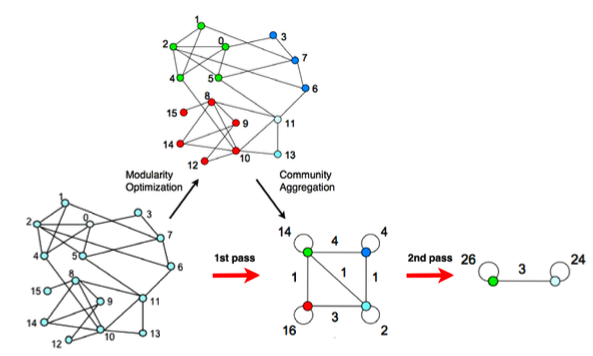


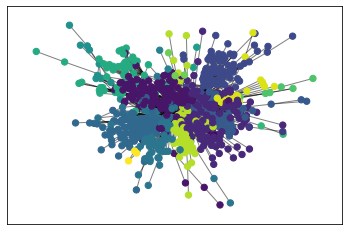

In [ ]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

partition = cl.best_partition(G_data)

pos = nx.spring_layout(G_data)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_data, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_data, pos, alpha=0.5)
plt.show()

## Link Prediction
- 노드 간 missing/latent link 예측
  - 구조적 유사성 지표를 통해 두 노드 간 유사한 정보를 기반으로 예측
  - 현재는 없지만 앞으로 링크(관계)가 생길 것이라고 예측
- indices: Common Neighbors, Adamic Adar, Preferential Attachment, Katz 등 [networkx](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html)에서 일부 link prediction metrics 제공

In [ ]:
common_neighbor = [(e[0], e[1], len(list(nx.common_neighbors(G_data, e[0], e[1])))) for e in nx.non_edges(G_data)]
common_neighbor.sort(key=lambda x: x[-1], reverse=True)
common_neighbor[:10]

[('Arya-Stark', 'Stannis-Baratheon', 20),
 ('Jaime-Lannister', 'Bran-Stark', 19),
 ('Brienne-of-Tarth', 'Eddard-Stark', 19),
 ('Brienne-of-Tarth', 'Petyr-Baelish', 18),
 ('Stannis-Baratheon', 'Bran-Stark', 18),
 ('Catelyn-Stark', 'Tommen-Baratheon', 16),
 ('Brienne-of-Tarth', 'Arya-Stark', 16),
 ('Arya-Stark', 'Loras-Tyrell', 16),
 ('Jon-Snow', 'Petyr-Baelish', 16),
 ('Margaery-Tyrell', 'Stannis-Baratheon', 16)]

In [ ]:
'''
공통 이웃이 많은 경우 더 연결될 가능성이 높음
'''
common_neighbor = nx.common_neighbor_centrality(G_data)
common_neighbor = list(common_neighbor)
common_neighbor.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in common_neighbor[:10]:
    print(f"({u}, {v}) -> {p}")

(Arya-Stark, Stannis-Baratheon) -> 95.59999999999998
(Jaime-Lannister, Bran-Stark) -> 94.79999999999998
(Brienne-of-Tarth, Eddard-Stark) -> 94.79999999999998
(Brienne-of-Tarth, Petyr-Baelish) -> 93.99999999999999
(Stannis-Baratheon, Bran-Stark) -> 93.99999999999999
(Catelyn-Stark, Tommen-Baratheon) -> 92.39999999999998
(Brienne-of-Tarth, Arya-Stark) -> 92.39999999999998
(Arya-Stark, Loras-Tyrell) -> 92.39999999999998
(Jon-Snow, Petyr-Baelish) -> 92.39999999999998
(Margaery-Tyrell, Stannis-Baratheon) -> 92.39999999999998


In [ ]:
'''
노드가 공통 이웃을 통해 다른 노드에 보낼 수 있는 정보를 기반으로 측정
'''
aa = nx.adamic_adar_index(G_data)
aa = list(aa)
aa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in aa[:10]:
    print(f"({u}, {v}) -> {p}")

(Jaime-Lannister, Bran-Stark) -> 5.425753364906164
(Brienne-of-Tarth, Eddard-Stark) -> 5.2666498235243715
(Arya-Stark, Stannis-Baratheon) -> 5.176877972330855
(Brienne-of-Tarth, Petyr-Baelish) -> 4.951472013301842
(Brienne-of-Tarth, Arya-Stark) -> 4.782766929583283
(Stannis-Baratheon, Bran-Stark) -> 4.718412597540896
(Margaery-Tyrell, Stannis-Baratheon) -> 4.698335927054334
(Sansa-Stark, Bronn) -> 4.28217696015498
(Arya-Stark, Loras-Tyrell) -> 4.278897331935221
(Catelyn-Stark, Tommen-Baratheon) -> 4.1139196142529775


In [ ]:
'''
degree가 높은 노드들이 결국은 연결될 것이라는 관점
'''
pa = nx.preferential_attachment(G_data)
pa = list(pa)
pa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in pa[:10]:
    print(f"({u}, {v}) -> {p}")

(Jon-Snow, Daenerys-Targaryen) -> 8322
(Arya-Stark, Stannis-Baratheon) -> 7476
(Jaime-Lannister, Daenerys-Targaryen) -> 7373
(Daenerys-Targaryen, Stannis-Baratheon) -> 6497
(Theon-Greyjoy, Cersei-Lannister) -> 6402
(Arya-Stark, Daenerys-Targaryen) -> 6132
(Catelyn-Stark, Daenerys-Targaryen) -> 5475
(Sansa-Stark, Daenerys-Targaryen) -> 5475
(Jon-Snow, Tywin-Lannister) -> 5472
(Jaime-Lannister, Bran-Stark) -> 5454


## REVIEW
1. over-sampling(up-sampling) / under-sampling(down-sampling)
  - 분류모형을 적용하는 경우에 y 변수의 범주가 불균형이 심하면 사용함
  - 한 범주는 너무 많고, 한 범주는 너무 적은 경우
    - 업샘플링: minor한 범주를 더 늘려줌, overfitting의 발생 확률이 높아짐
      - SMOTE: imbalanced learning
    - 다운샘플링: major한 범주를 줄여줌, but 정보 손실이 발생함
  - 범주의 불균형은 예측 질을 저하시킴
2. clustering [군집분석]
  - 계층적 클러스터링
    - 소규모 데이터 분석에 적합
    - dendrogram을 통해 클러스터 결정
    - 시각화하기 좋은 방법!
  - K-Means 클러스터링
    - 대규모 데이터 분석에도 적용 가능
    - inertia 값이 최소인 경우를 찾음
    - 계층적 클러스터링보다 더 좋은 방법!
3. Association Rule Mining
  - transaction: 빈번하게 발생하는 아이템의 pair
  - support, confidence, lift
    1. transaction encoding
    2. apriori: 패턴 후보 탐색(최소지지도 걸어서 기준 미만은 잘라냄)
    3. association rules: 본격적으로 탐색(최소신회로 걸기)하여 lift로 정렬함
  - 인과관계로 해석을 하면 안됨!!!
  - mlxtend 패키지
4. graph(network)
  - node, edge
  - networkx 패키지
    - Graph()
    - DiGraph()
  - edgelist를 통한 그래프 생성
  - degree centrality
  - betweenness centrality
  - closeness centrality
  - eigenvector centrality